
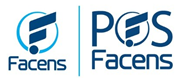

# <center>Especialização em Ciência dos Dados: Aprendizado de Máquina </center>

Instruções para a realização desta atividade:

1. Faça o download deste notebook Jupyter para sua estação de trabalho
2. Realize as atividades solicitadas dentro do notebook, nos espaços apropriados e indicados
3. Salve o notebook no seguinte padrão: <nome_sobrenome_RA>.ipynb (por exemplo: **rodrigo_caropreso_123456.ipynb ** )
4. Envie o notebook com a atividade realizada na sala de aula da disciplina (Google Classroom)

** DATA DE ENTREGA DESTA ATIVIDADE: 01/12/2018 **

** VALOR DESTA ATIVIDADE: 2,0 pontos **


## <center> Exercício 1 - Particle Swarm Optimization </center>

### Otimização é a procura pelo melhor desempenho em direção a um ou alguns pontos que maximiza(m)/minimiza(m) uma função, ou seja, é a busca da melhor solução para um dado problema.

### O Particle Swarm Optimization é um algoritmo que realiza esta busca baseado nos mecanismos de inteligência coletiva e conhecimento adquirido por um grupo de entidades (o enxame).

### Seu funcionamento básico consiste na análise da posição e velocidade de cada partícula do enxame, onde a posição indica uma possível solução e a velocidade é utilizada para realizar o deslocamento de todo o grupo a fim de encontrar soluções cada vez melhores.

### Em termos computacionais, o PSO possui uma estrutura algorítmica conforme o pseudocódigo a seguir:

//Inicialização – Código em Pseudocódigo da Particle Swarm Optimization//
1. Inicialize aleatoriamente as posições $ x_i^k $ e $ v_i^k $ velocidades das partículas.
2. Inicialize $ pbest_i $ e $ gbest_k $  
3. Para cada partícula i, faça as seguintes instruções:  
  //Atualize a melhor posição da partícula atual $ pbest_i $ //    
  Se $ x_i^k > pbest_i $ então      
  >   Para cada dimensão d do problema faça $ pbest_i = x_i^k $  </p>
  
  //Atualiza a melhor partícula//  
  Para cada partícula vizinha, faça  
  >    Se $ pbest_i > gbest_k $ então $ gbest_k = pbest_i $    
  
  //Atualização das posições//      
  Para cada dimensão d do problema faça  
  >    Calcula $ v_i^k+1 $ de acordo com a expressão dada em aula.  
  
  Verifique a condição de **vmax** dada em aula.   
5. Atualize $ x_i^k+1 $ de acordo com a equação vista em aula.  
//Condição de término//  
6. Caso a condição de término não seja satisfeita, volte ao passo 4  

## Um exemplo simples de otimização é a melhoria da imagem das televisões com antena acoplada. Através do ajuste manual da antena, várias soluções são testadas, guiadas pela qualidade de imagem obtida na TV, até a obtenção de uma resposta ótima, ou seja, uma boa imagem.

## Considere então a seguinte função matemática que representa um sinal de TV:  

<p>
<center>
$
    \large f(x) = x \cdot sen (10 \cdot \pi \cdot x) + 1
$
</center>


## Siga as atividades abaixo e construa um algoritmo PSO capaz de otimizar este sinal encontrando seu valor máximo dentro do domínio $ x \in [-1; 2] $

## A função custo f(x) irá variar no intervalo $ y \in [-1; 3] $

# Descrição da partícula

## No contexto desta atividade, cada partícula será descrita como um dicionário python com os seguintes atributos:


> **'X'    : x**     (coordenada X da partícula, e possível valor de solução do problema)  
> **'VX'   : vx**    (velocidade da partícula na direção do eixo x)  
> **'XBest': xbest** (melhor posição da partícula ao longo do tempo)

## Ainda no contexto desta atividade, o conhecimento do grupo (GBest) será modelado como um dicionário python com os seguintes atributos:

> **'XGBest'      : xgb** (coordenada X da melhor posição conhecida por todo o enxame)  
> **'XGBestFitness' : ygb** (valor da função-custo calculado no ponto xgb)

### Importando os módulos necessários

In [69]:
import numpy as np
import math
import matplotlib.pyplot as plt
from enum import Enum
from operator import xor
%matplotlib inline

## 1 - Codifique a função custo (fitness) que representa f(x) descrita acima.

In [70]:
#CÉLULA PSO-LIB-01
'''
# Função para cálculo de fitness (aptidão de cada partícula)
# Esta função recebe como parâmetro a coordenada de posição X de uma partícula no formato de dicionário descrito acima e, 
#retorna um valor Y que corresponde ao cálculo de f(x) dado acima.
'''

def fitness(X) :
    #f(x)=x⋅sen(10⋅π⋅x)+1
    #IMPLEMENTE O CÓDIGO AQUI
    Y = X * (np.sin(10*np.pi*X))+1    
    return Y

# Teste - use o código abaixo para validar sua implementação


> p1 = {'X' : 0.,  'VX' :  1., 'XBest':  0.}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.}  
> p3 = {'X' : 2.,  'VX' :  2., 'XBest':  2.}  
> print('f(p1)={}; f(p2)={}; f(p3)=-{};'.format(fitness(p1['X']), fitness(p2['X']), fitness(p3['X'])))  

** Valor esperado: ** f(p1)=1.0; f(p2)=0.9999999999999988; f(p3)=-0.9999999999999951;


In [71]:
# teste resposta
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 2.}
print('f(p1)={}; f(p2)={}; f(p3)=-{};'.format(fitness(p1['X']), fitness(p2['X']), fitness(p3['X'])))

f(p1)=1.0; f(p2)=0.9999999999999988; f(p3)=-0.9999999999999951;


## 2 - Codifique o método que plota o gráfico da função custo dentro do domínio do problema, ou seja, o gráfico ( x, f(x) ).

In [73]:
#CÉLULA PSO-LIB-02

'''
Esta função recebe como parâmetros:
P          -> enxame de particulas, uma lista de particulas modeladas conforme o enunciado
generation -> valor da 'geração' ou movimento que as partículas executaram, iniciando em 1.
'''

def plot_population(P, generation):
    
    # IMPLEMENTE O CODIGO
    # 1. DEFINA O DOMINIO DA FUNCAO
    # 2. CALCULE O FITNESS DE TODAS AS PARTICULAS
    # 3. PLOTE O GRAFICO     
    xmin =-1
    xmax = 2
    ymin =-1
    ymax = 3
    
    xarry = []
    yarry = []
    for particle in vParticles:
        x = particle['X']
        y = fitness(generation)
        xarry.append(x)
        yarry.append(y)
    
    
    plt.figure()
    plt.plot(xarry,yarry,'ro')
    sTitle = ('Populacao na geração {}'.format(generation))
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title(sTitle)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    

# Teste - use o código abaixo para validar sua implementação

> p1 = {'X' :  0., 'VX' :  1., 'XBest':  0.}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.}  
> p3 = {'X' :  2., 'VX' :  2., 'XBest':  2.}  
> vParticles = [p1, p2, p3]  
> plot_population(vParticles, 1)  

## Valor esperado

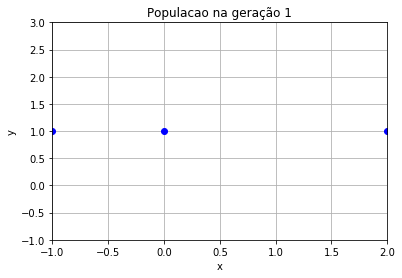


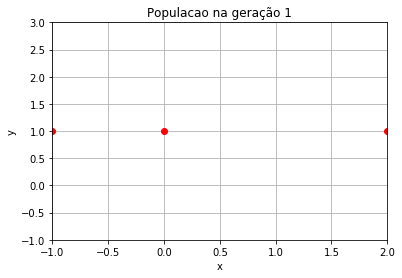

In [74]:
# teste resposta
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 2.}
vParticles = [p1, p2, p3]
plot_population(vParticles, 1)

## 3 - Codifique o método que verifica o valor de pBest, a melhor posição obtida por uma dada partícula.

In [90]:
#CÉLULA PSO-LIB-03

'''
Esta função recebe como parâmetro uma partícula conforme descrita no enunciado do problema.
Ela retorna o valor de XBest, a melhor posição desta partícula.
'''

def calcPBest(particle) :   
    x = particle['X']
    xBest = particle['XBest']
    currentFitness = fitness((x))
    if (currentFitness >= fitness((xBest)) ) :
        xBest = x                
    return xBest


# Teste - use o código abaixo para validar sua implementação

> p1 = {'X' :  0., 'VX' :  1., 'XBest':  0.5}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}  
> p3 = {'X' :  2., 'VX' :  2., 'XBest':  1.}  
> vParticles = [p1, p2, p3]  
> print( 'p1: Xbest = {}'.format(calcPBest(p1)))  
> print( 'p2: Xbest = {}'.format(calcPBest(p2)))  
> print( 'p3: Xbest = {}'.format(calcPBest(p3)))  

## Valor esperado
p1: Xbest = 0.5
p2: Xbest = -1.0
p3: Xbest = 1.0


In [92]:
#teste resposta
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.5}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 1.}
vParticles = [p1, p2, p3]
print( 'p1: Xbest = {}'.format(calcPBest(p1)))
print( 'p2: Xbest = {}'.format(calcPBest(p2)))
print( 'p3: Xbest = {}'.format(calcPBest(p3)))


p1: Xbest = 0.5
p2: Xbest = -1.0
p3: Xbest = 1.0


## 4 - Codifique o método auxiliar que atualiza todos os valores de pBest do enxame.

In [93]:
#CÉLULA PSO-LIB-04

'''
Este método recebe como parâmetro a coleção (lista) que representa todo o enxame de partículas e varre esta lista atualizando
o pBest de cada partícula.

O método retorna uma cópia da lista com os valores de pBest atualizados.
'''

def calcAllPBest(vParticles) :
    vParticlesRet = []
    
    for particle in vParticles :
        x = particle['X']
        
        xBest = particle['XBest']
        
        if (fitness((x)) >= fitness((xBest)) ) :
            particle['XBest'] = x
            
            
        vParticlesRet.append(particle)
    
    return vParticlesRet

# Teste - use o código abaixo para validar sua implementação

> p1 = {'X' :  0., 'VX' :  1., 'XBest':  0.5}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}  
> p3 = {'X' :  2., 'VX' :  2., 'XBest':  1.}  
> vParticles = [p1, p2, p3]  

> vParticles = calcAllPBest(vParticles)  
> print(vParticles)

## Valor esperado
[{'VX': 1.0, 'XBest': 0.5, 'X': 0.0}, {'VX': -1.0, 'XBest': -1.0, 'X': -1.0}, {'VX': 2.0, 'XBest': 1.0, 'X': 2.0}]

In [94]:
#teste respsota
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.5}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 1.}
vParticles = [p1, p2, p3]

vParticles = calcAllPBest(vParticles)
print(vParticles)

[{'X': 0.0, 'VX': 1.0, 'XBest': 0.5}, {'X': -1.0, 'VX': -1.0, 'XBest': -1.0}, {'X': 2.0, 'VX': 2.0, 'XBest': 1.0}]


## 5 - Codifique o método auxiliar que verifica o valor de GBest do enxame.

In [107]:
#CÉLULA PSO-LIB-05

'''
Este método recebe como parâmetro a coleção (lista) que representa todo o enxame de partículas e varre esta lista atualizando
o pBest de cada partícula.

A seguir o método verifica qual é o melhor pBest de todas as particulas e retorna um dicionario com atributos 'XGBest' e 'XGBestFitness',
onde 'XGBest' é a posição da partícula que gerou o melhor custo (fitness) conhecido pelo bando e XGBestFitness é o valor 
do custo calculado para XGBest.
'''

def calcGBest(vParticles) :
    #Inicializa variavel
    calcAllPBest(vParticles)
    x = vParticles[0]['XBest']
    
    maxFitness = fitness((x))

    for particle in vParticles :
        x = particle['XBest']
    
        currentFitness = fitness((x))
        if ( currentFitness >= maxFitness ) :
            maxFitness = currentFitness
            gBest = {'X' : x, 'XBestFitness' : maxFitness}
    
    return gBest

In [108]:
p1 = {'X' : 0., 'VX' : 1., 'XBest': 0.5}
p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}
p3 = {'X' : 2., 'VX' : 2., 'XBest': 1.}
vParticles = [p1, p2, p3]

gBest = calcGBest(vParticles)
print(gBest)

{'X': 0.5, 'XBestFitness': 1.0000000000000002}


# Teste - use o código abaixo para validar sua implementação

> p1 = {'X' :  0., 'VX' :  1., 'XBest':  0.5}  
> p2 = {'X' : -1., 'VX' : -1., 'XBest': -1.2}  
> p3 = {'X' :  2., 'VX' :  2., 'XBest':  1.}  
> vParticles = [p1, p2, p3]  

> gBest = calcGBest(vParticles)  
> print(gBest)

## Valor esperado
{'XGBest': 0.5, 'XGBestFitness': 1.0000000000000002}

# PSO - inicio

In [139]:
#CÉLULA PSO-MAIN-01
#Parâmetros
size_pop   = 100
max_generations = 100

#Limites do dominio de definição
x_min = -1
x_max =  2

y_min = -1
y_max =  3

gBest = {'XGBest' : 0, 'XGBestFitness' : 0}
vParticles = []

deltaT = 1
c1 = 0.3
c2 = 0.6
w  = 0.2

vMax = 0.1 #limitação de velocidade

## 6 - Inicialize o enxame de particulas com posições e velocidades aleatórias e calcule o gBest do enxame, imprimindo seu valor.

In [122]:
#CÉLULA PSO-MAIN-02
#Inicializando população
vParticles=[]

for _ in range(0, size_pop):
    x   =  x_min + np.random.random() * (x_max - x_min)
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vParticles.append({'X' : x, 'XBest' : x, 'VX' : vx, })
    
#Calcula pBest
#vParticles = calcPBest(vParticles)

#Calcula gbest
gBest = calcGBest(vParticles)
print(gBest)
print(vParticles)

{'X': 1.0713554003423642, 'XBestFitness': 1.8391526752147525}
[{'X': -0.5584702475626911, 'XBest': -0.5584702475626911, 'VX': 0.869394456700995}, {'X': 0.3991011812207004, 'XBest': 0.3991011812207004, 'VX': 0.5309185620687309}, {'X': 0.5406199580292017, 'XBest': 0.5406199580292017, 'VX': -0.2864005439949011}, {'X': 1.1556410622494013, 'XBest': 1.1556410622494013, 'VX': 0.1732272990113901}, {'X': 1.802631979189468, 'XBest': 1.802631979189468, 'VX': 1.6334021141705581}, {'X': -0.8605981355655858, 'XBest': -0.8605981355655858, 'VX': 0.6065434189211003}, {'X': 0.28207675085037565, 'XBest': 0.28207675085037565, 'VX': 0.7495545791614666}, {'X': -0.9151763822427751, 'XBest': -0.9151763822427751, 'VX': -0.8856628675157292}, {'X': -0.011653537785509815, 'XBest': -0.011653537785509815, 'VX': -0.24026536085673733}, {'X': 0.29944249214666563, 'XBest': 0.29944249214666563, 'VX': -0.5145585121750317}, {'X': 0.40980813025073237, 'XBest': 0.40980813025073237, 'VX': -0.7208346340191161}, {'X': 0.756746

## 7 - Plote o gráfico do enxame no instante inicial, utilizando valor 1 para o 'generation_index'

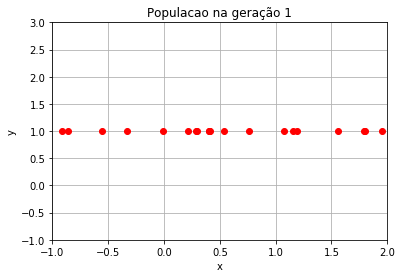

In [123]:
#CÉLULA PSO-MAIN-02
#IMPLEMENTE O CÓDIGO

generation_index = 1
plot_population(vParticles, generation_index)
  

## 8 - Complete a implementação da função abaixo, que contém o núcleo do algoritmo PSO

In [124]:
def runEpoch(vParticles) :
        #Atualizando vetor de velocidades
    r1 = np.random.random()
    r2 = np.random.random()

    #Atualiza pBest
    #vParticles = calcPBest(vParticles)
    
    for particle in vParticles :
        
        #Atualiza pbest
        (xBest) = calcPBest(particle)
        particle['XBest'] = xBest
        
        
        #Atualiza gbest
        gBest = calcGBest(vParticles)
        
        #Atualiza velocidade de uma particula
        newVX = w*particle['VX'] + c1*r1*(particle['XBest'] - particle['X']) + c2*r2*(gBest['X'] - particle['X'])
        
        
        #Equação sem a inercia da particula
        #newVX = c1*r1*(particle['XBest'] - particle['X']) + c2*r2*(gBest['X'] - particle['X'])
        #newVY = c1*r1*(particle['YBest'] - particle['Y']) + c2*r2*(gBest['Y'] - particle['Y'])
        
        #Verifica limite de velocidade
        if (newVX <= -vMax ) :
            newVX = -vMax

        if (newVX >= vMax ) :
            newVX = vMax

        #Atualiza a velocidade da particula
        particle['VX'] = newVX
        

        #Atualiza a posição da particula
        newX = particle['X'] + newVX * deltaT
        
        
        particle['X'] = newX
        

    return vParticles

## 9 - Execute a célula abaixo para verificar se o algoritmo PSO apresenta convergência.

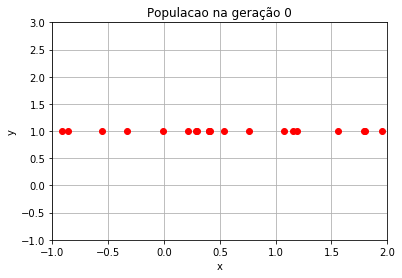

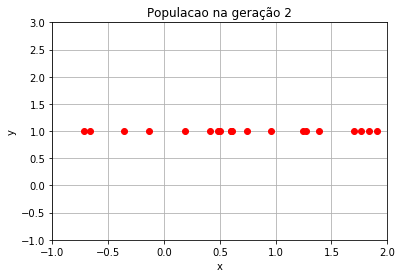

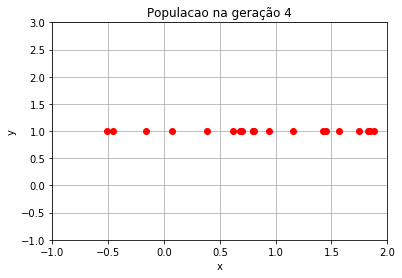

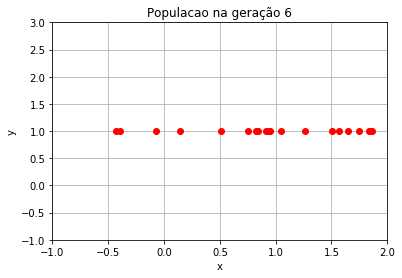

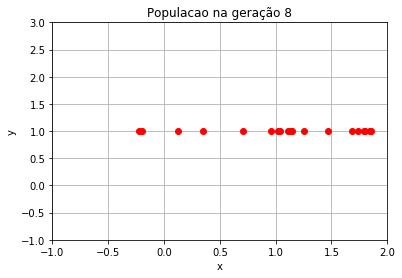

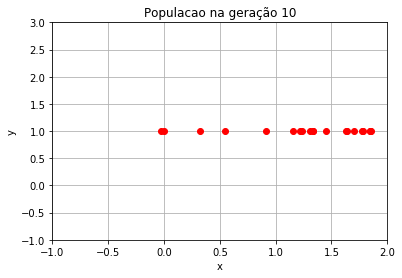

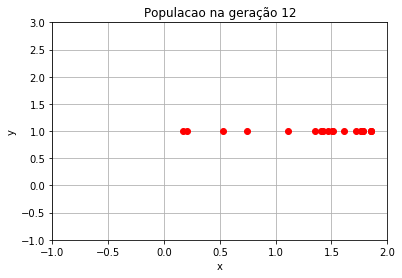

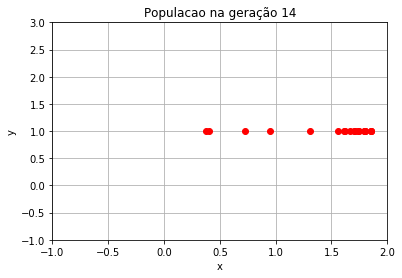

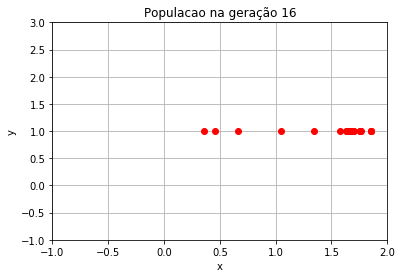

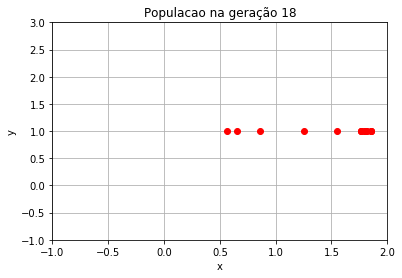

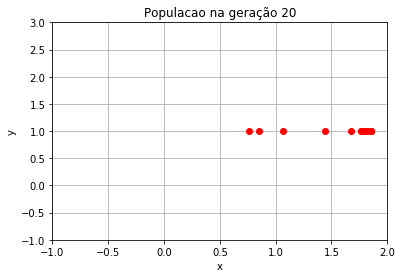

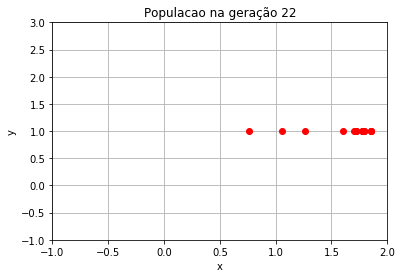

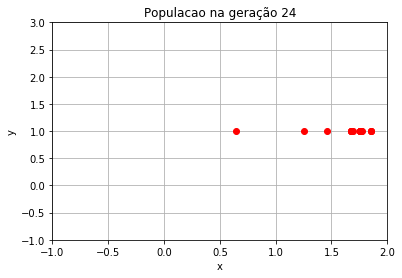

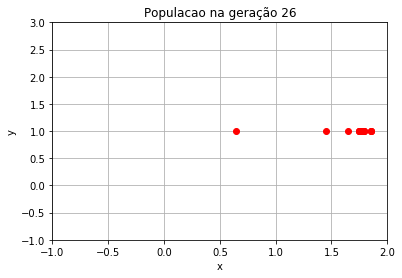

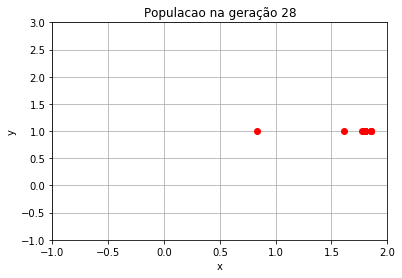

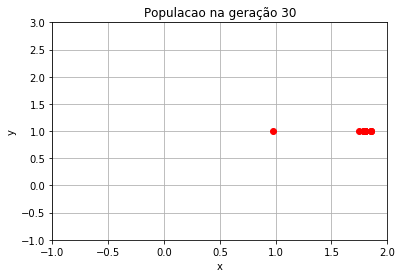

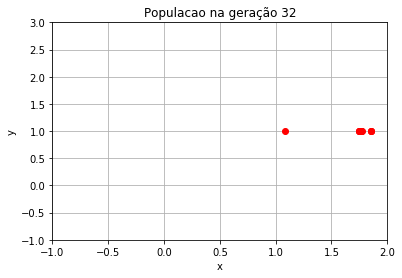

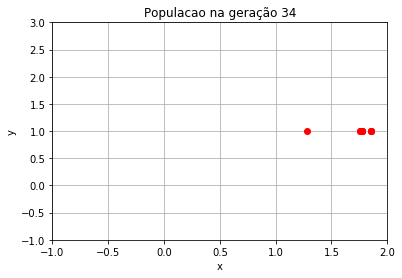

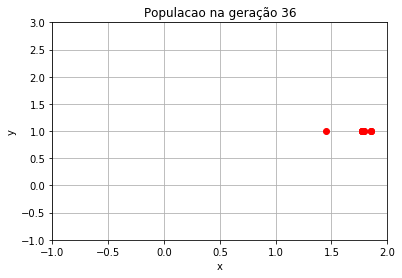

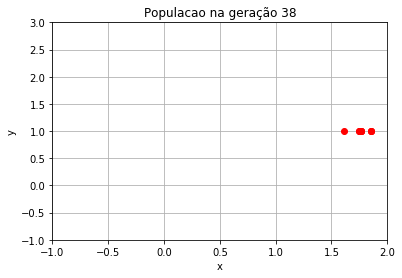

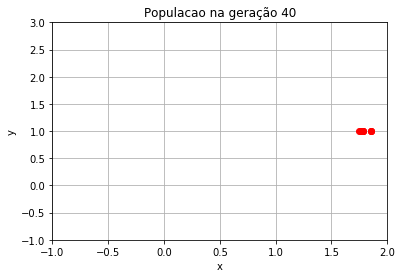

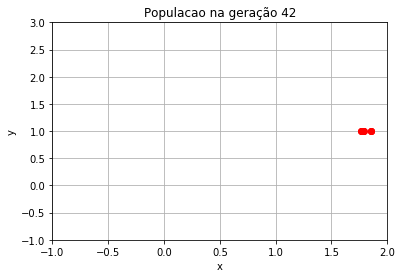

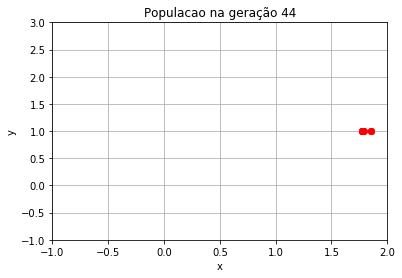

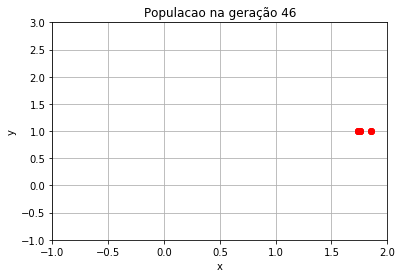

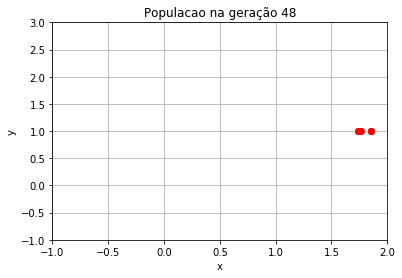

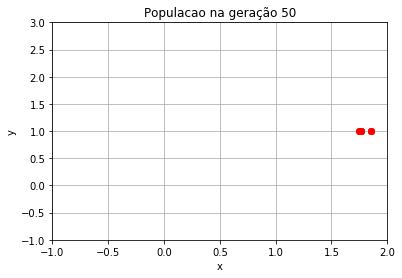

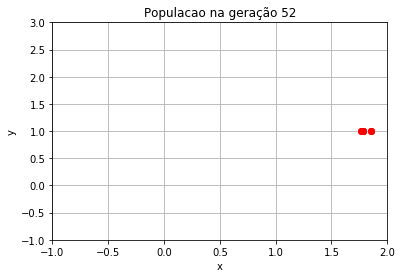

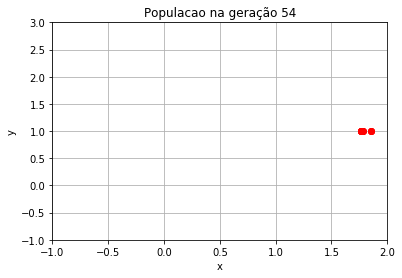

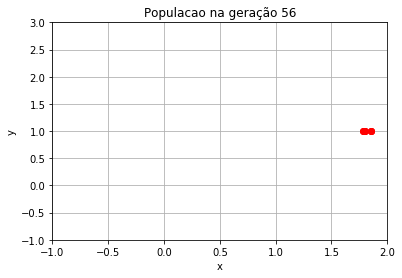

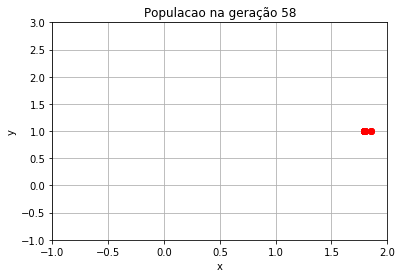

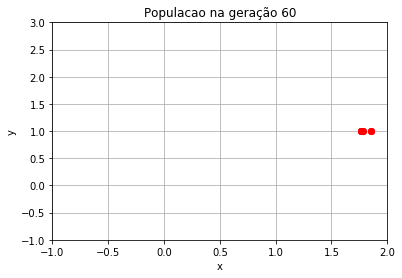

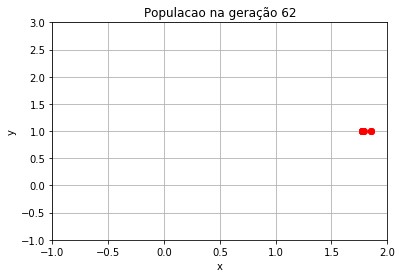

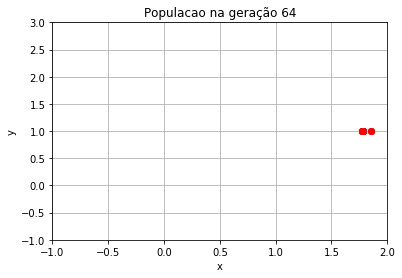

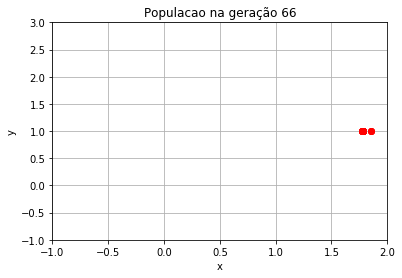

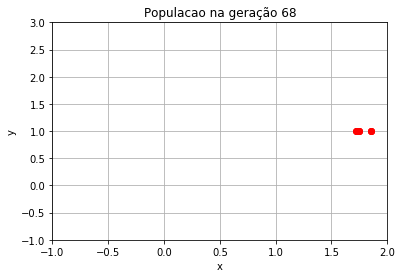

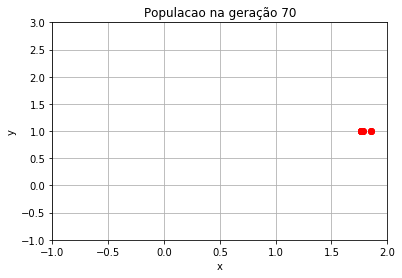

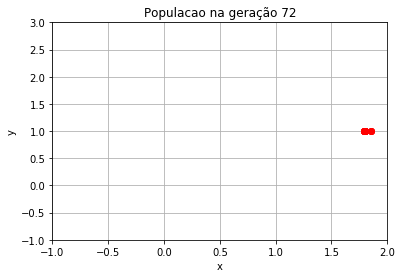

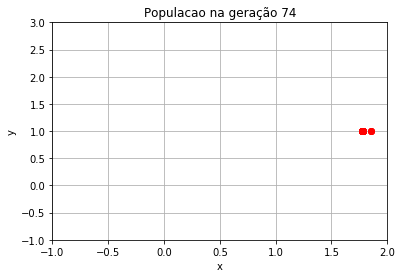

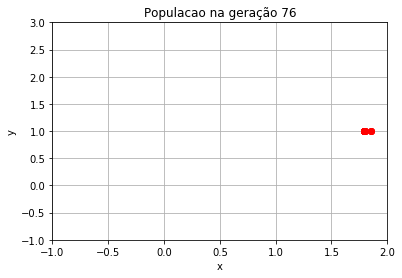

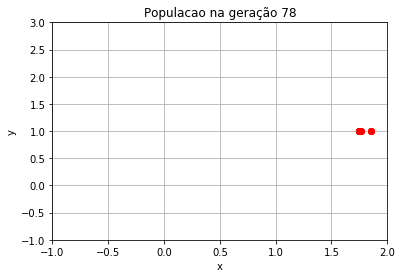

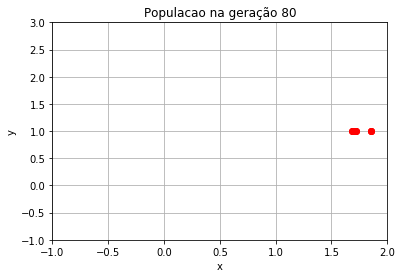

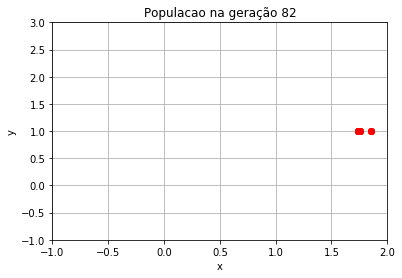

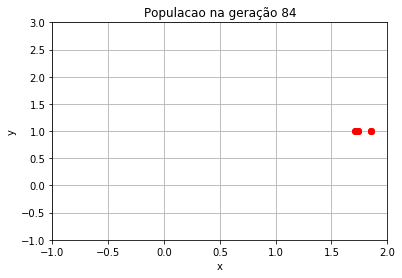

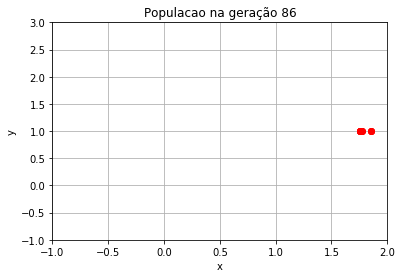

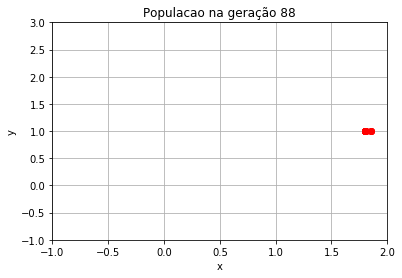

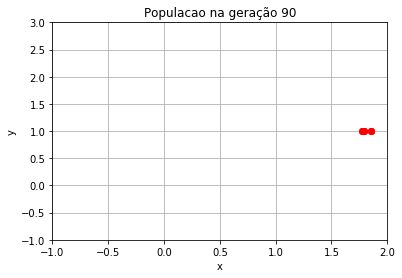

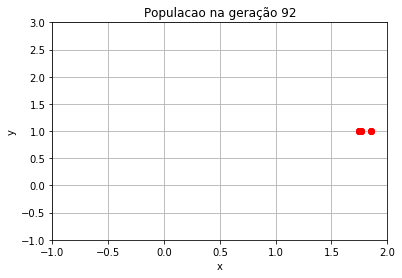

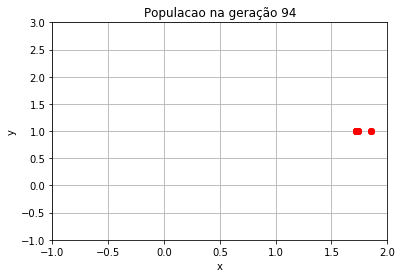

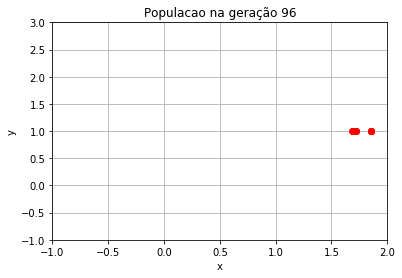

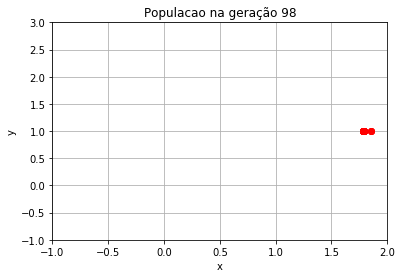

In [125]:
#CÉLULA PSO-MAIN-04
#Loop principal
generation_index = 0
for generation_index in range(0, max_generations) :
        
    if(generation_index % 2 == 0) :
        plot_population(vParticles, generation_index)
        
    vParticles = runEpoch(vParticles)
                
#print(generation_index)

#print(vParticles)

## Validação

### Execute o algoritmo e Observe se ocorre convergência. Utilize o código abaixo para determinar a solução.

A convergencia foi atingida na geração: 99
A particula vencedora foi: {'X': 1.6500686111679053, 'XBestFitness': 2.6500647779702975}, com aptidão 2.6500647779702975
A solução do problema é x=1.6500686111679053


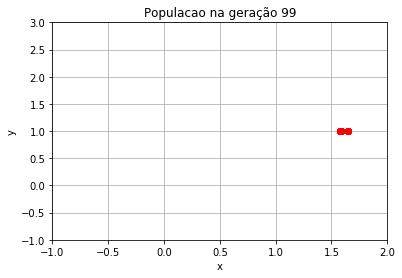

In [114]:
#CÉLULA PSO-MAIN-05
#Verificando os resultados
gBest = calcGBest(vParticles)

print('A convergencia foi atingida na geração: {}'.format(generation_index))
print('A particula vencedora foi: {}, com aptidão {}'.format(gBest, gBest['XBestFitness']))
print('A solução do problema é x={}'.format(gBest['X']))

plot_population(vParticles, generation_index)

# Bônus Stage: exercite os parâmetros do modelo.

## Verifique o que acontece com a convergência, caso você modifique a velocidade limite v_max (v_max = 0.003, por exemplo)

Resposta: Não houve convergencia.

{'X': 1.8231957777953713, 'XBestFitness': 2.2140896179377165}
[{'X': 0.845054936054364, 'XBest': 0.845054936054364, 'VX': 1.0291055465681405}, {'X': 1.9020165449277973, 'XBest': 1.9020165449277973, 'VX': 0.27334072659922337}, {'X': 0.14885870412132496, 'XBest': 0.14885870412132496, 'VX': -0.414470982557557}, {'X': 0.4110764790741852, 'XBest': 0.4110764790741852, 'VX': -0.6996974169188811}, {'X': 0.24877482456023126, 'XBest': 0.24877482456023126, 'VX': -0.5701251383003384}, {'X': 0.12840364146312577, 'XBest': 0.12840364146312577, 'VX': 0.3620569832718643}, {'X': 0.7604711796216566, 'XBest': 0.7604711796216566, 'VX': 0.36734889914948354}, {'X': 1.230691915281132, 'XBest': 1.230691915281132, 'VX': -0.7422275068899735}, {'X': 1.579498638438285, 'XBest': 1.579498638438285, 'VX': -0.831418323323164}, {'X': 0.06311015381028318, 'XBest': 0.06311015381028318, 'VX': 1.411264684631624}, {'X': 1.9612779999093934, 'XBest': 1.9612779999093934, 'VX': -0.8821545717664144}, {'X': -0.8379850485627106, '

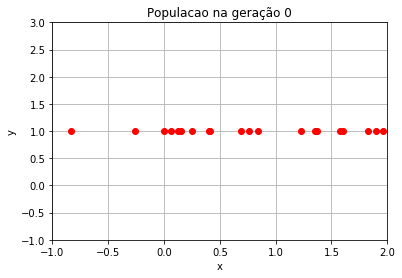

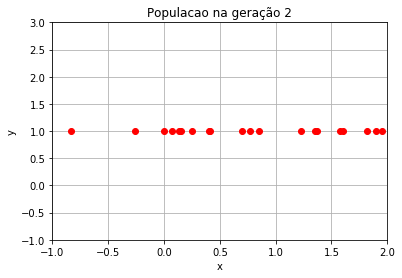

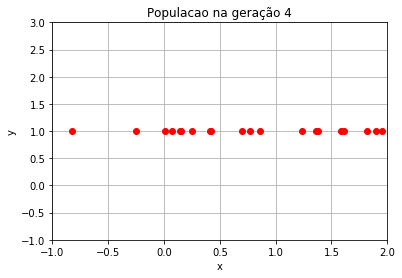

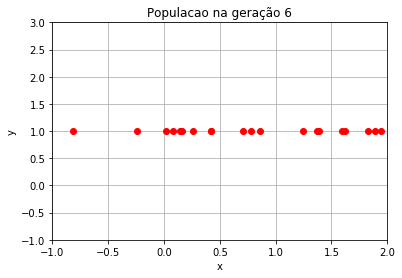

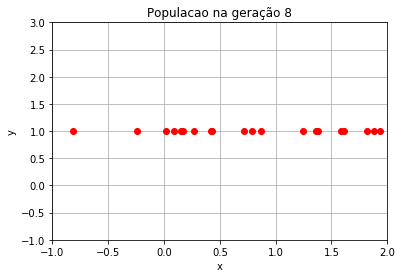

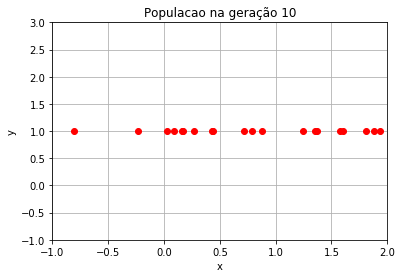

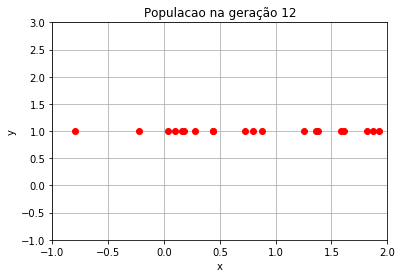

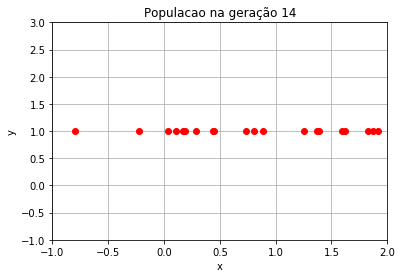

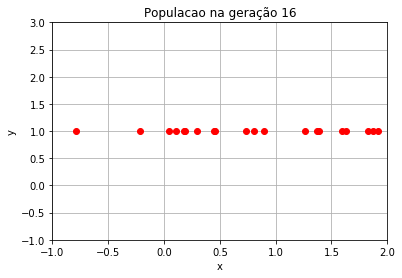

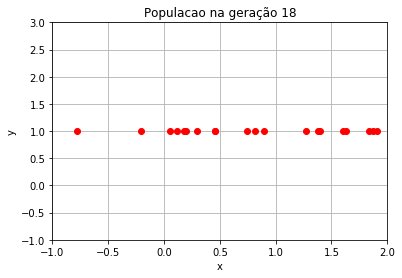

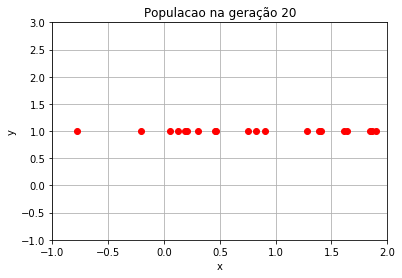

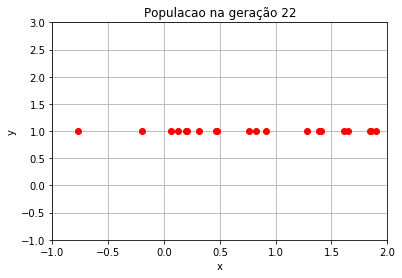

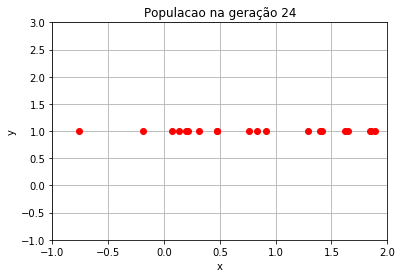

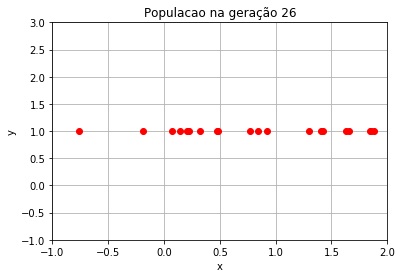

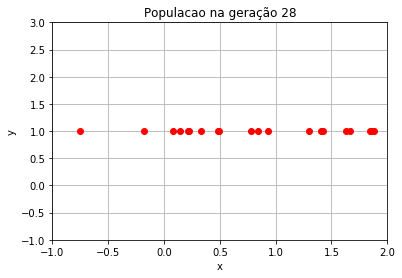

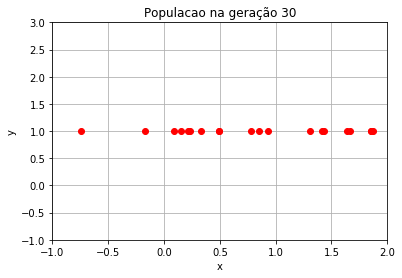

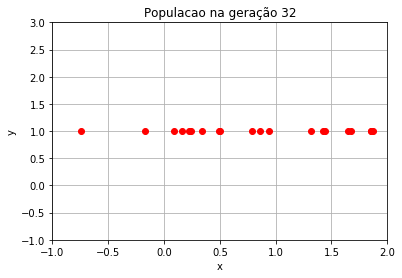

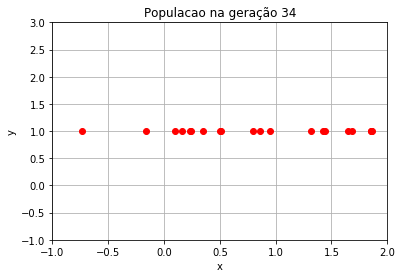

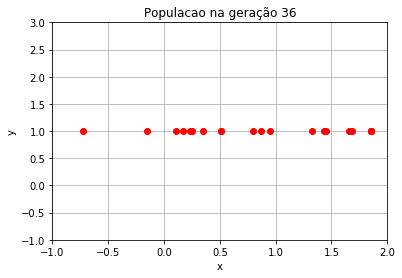

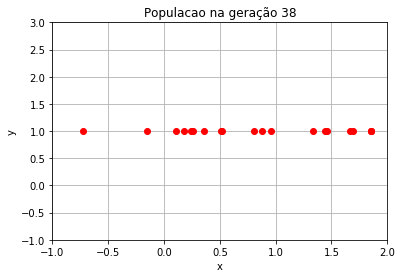

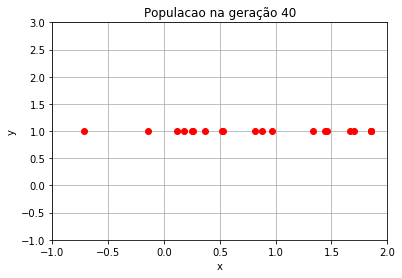

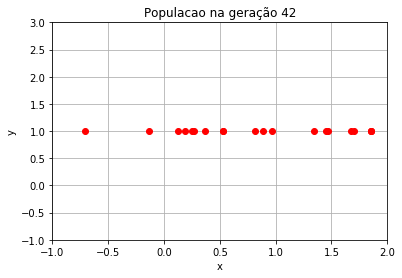

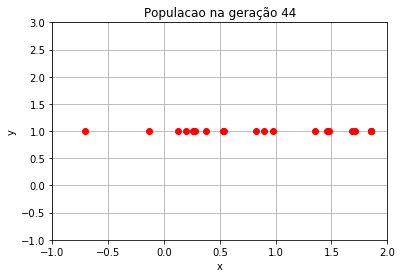

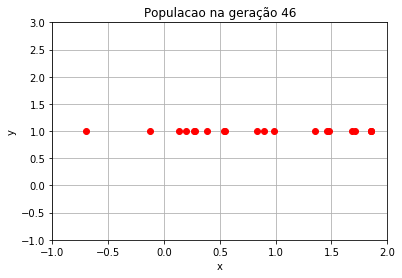

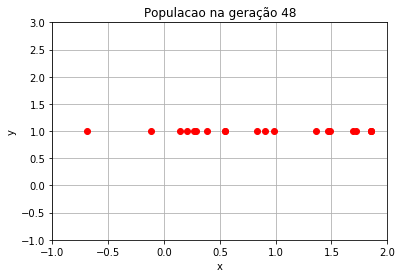

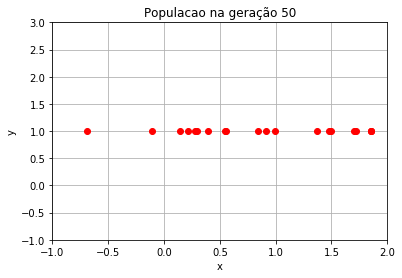

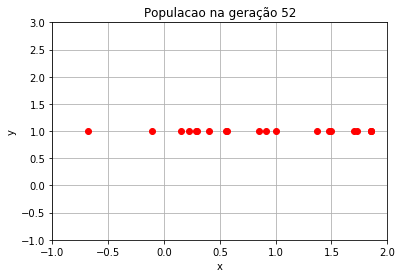

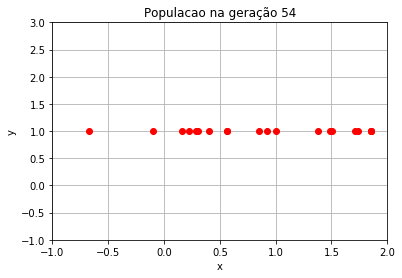

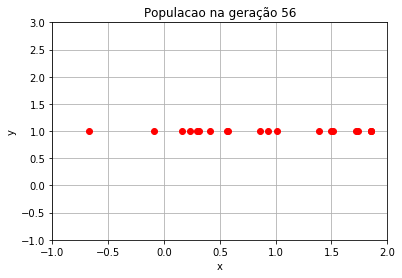

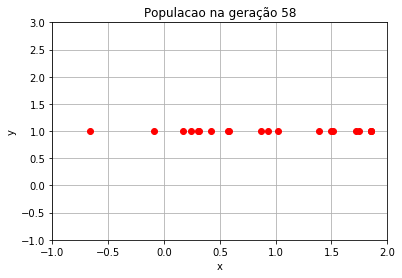

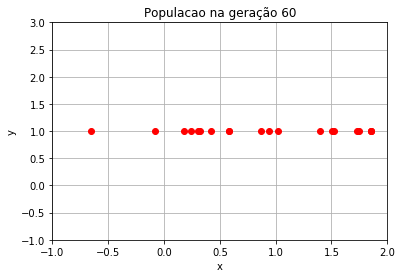

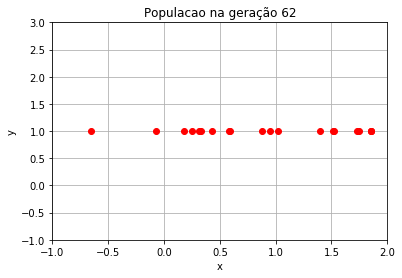

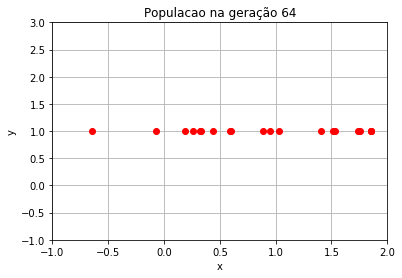

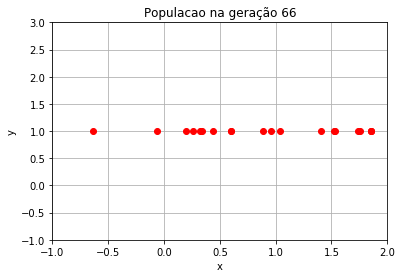

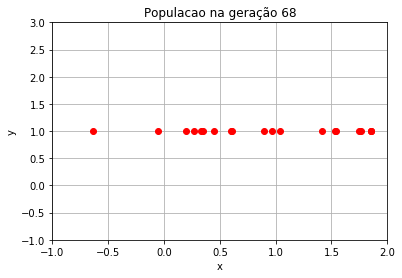

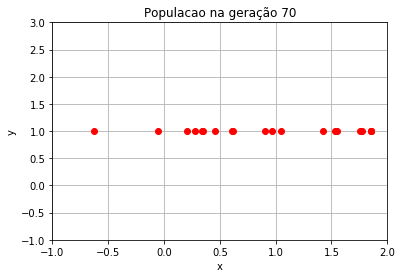

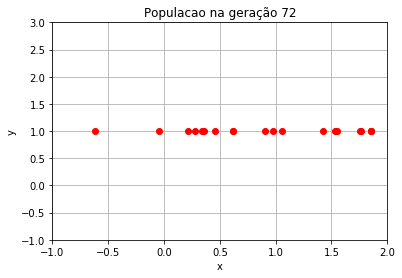

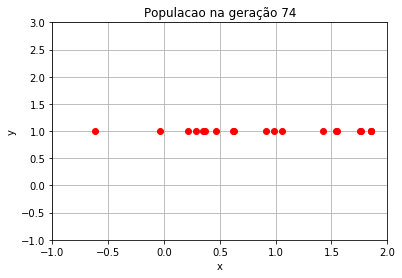

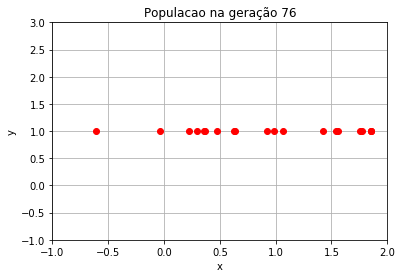

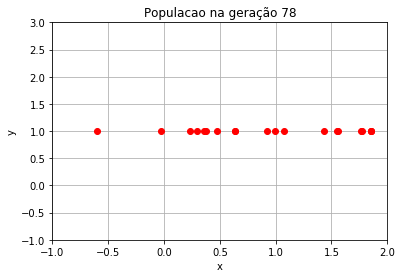

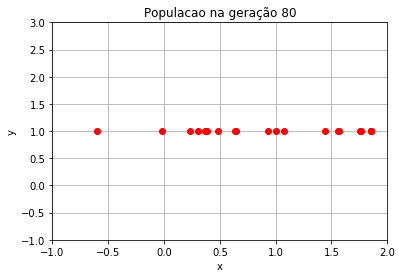

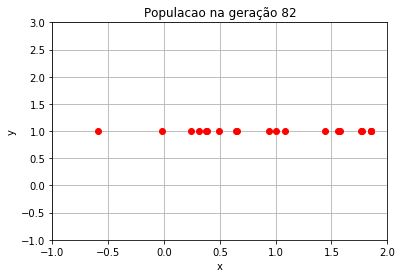

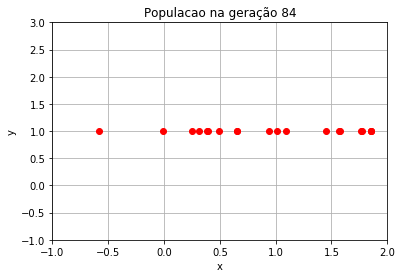

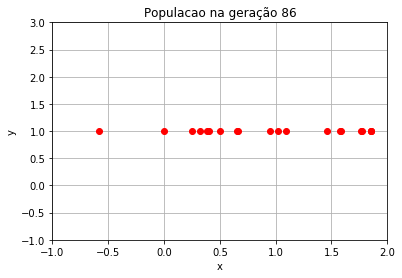

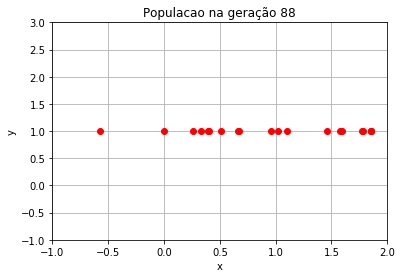

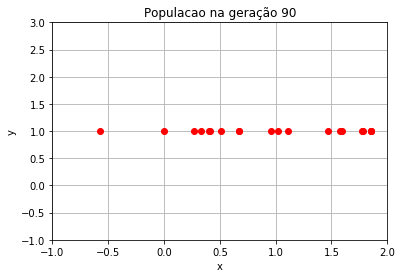

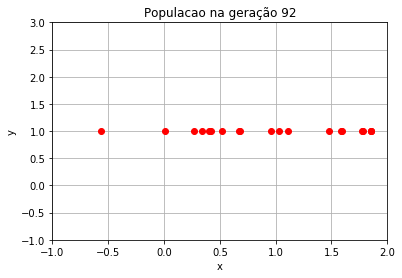

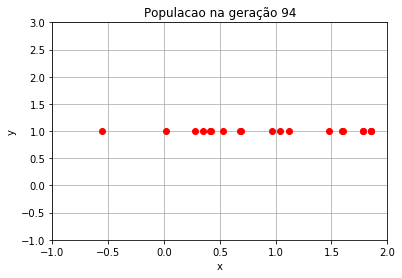

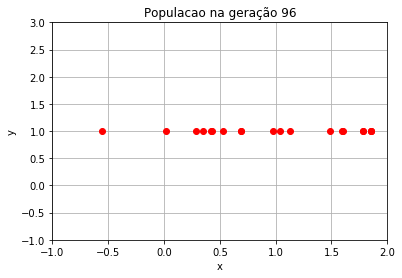

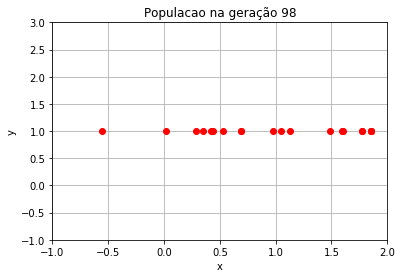

In [126]:
vMax = 0.003
vParticles=[]

for _ in range(0, size_pop):
    x   =  x_min + np.random.random() * (x_max - x_min)
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vParticles.append({'X' : x, 'XBest' : x, 'VX' : vx, })
    
#Calcula pBest
#vParticles = calcPBest(vParticles)

#Calcula gbest
gBest = calcGBest(vParticles)
print(gBest)
print(vParticles)

#CÉLULA PSO-MAIN-04
#Loop principal
generation_index = 0
for generation_index in range(0, max_generations) :
        
    if(generation_index % 2 == 0) :
        plot_population(vParticles, generation_index)
        
    vParticles = runEpoch(vParticles)
                
#print(generation_index)



A convergencia foi atingida na geração: 99
A particula vencedora foi: {'X': 1.8505427452378294, 'XBestFitness': 2.850273746407197}, com aptidão 2.850273746407197
A solução do problema é x=1.8505427452378294


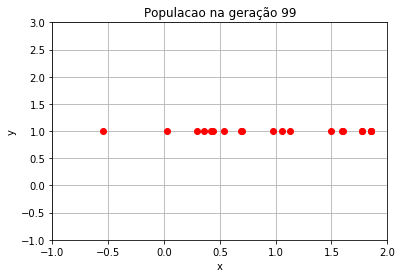

In [127]:
#print(vParticles)
gBest = calcGBest(vParticles)

print('A convergencia foi atingida na geração: {}'.format(generation_index))
print('A particula vencedora foi: {}, com aptidão {}'.format(gBest, gBest['XBestFitness']))
print('A solução do problema é x={}'.format(gBest['X']))

plot_population(vParticles, generation_index)



## Verifique o que acontece com a convergência, caso você reduza o tamanho da população (20 ou 30 particulas).
Resposta: Convergiu ficou bem bem mais apurada

In [132]:
vMax = 0.1
vParticles=[]

for _ in range(0, 30):
    x   =  x_min + np.random.random() * (x_max - x_min)
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vParticles.append({'X' : x, 'XBest' : x, 'VX' : vx, })
    
#Calcula pBest
#vParticles = calcPBest(vParticles)

#Calcula gbest
gBest = calcGBest(vParticles)
print(gBest)
print(vParticles)


{'X': 1.6453614029428416, 'XBestFitness': 2.627921837531498}
[{'X': 0.9454942108912898, 'XBest': 0.9454942108912898, 'VX': 0.8149900873140359}, {'X': 1.372726144865994, 'XBest': 1.372726144865994, 'VX': 0.03740770204213173}, {'X': 0.5624928245008722, 'XBest': 0.5624928245008722, 'VX': -0.9878255421977532}, {'X': -0.07533339668047634, 'XBest': -0.07533339668047634, 'VX': 0.11402627325248371}, {'X': 1.3737447626633115, 'XBest': 1.3737447626633115, 'VX': -0.9150673763283982}, {'X': 0.9600874137160207, 'XBest': 0.9600874137160207, 'VX': 1.6212671681441102}, {'X': 1.633271391276193, 'XBest': 1.633271391276193, 'VX': -0.6601215489334684}, {'X': 0.006497166164947998, 'XBest': 0.006497166164947998, 'VX': 0.8494624777577671}, {'X': 1.9202872528509158, 'XBest': 1.9202872528509158, 'VX': 1.0788787908153772}, {'X': 0.021037113356454196, 'XBest': 0.021037113356454196, 'VX': -0.6115381258946292}, {'X': -0.25485544409371264, 'XBest': -0.25485544409371264, 'VX': -0.3750760922521128}, {'X': -0.76920426

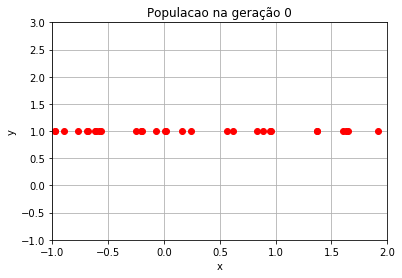

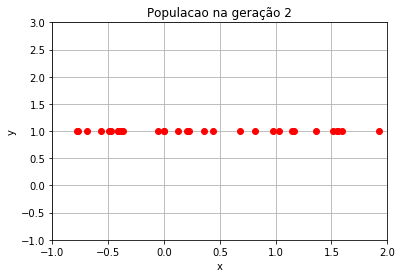

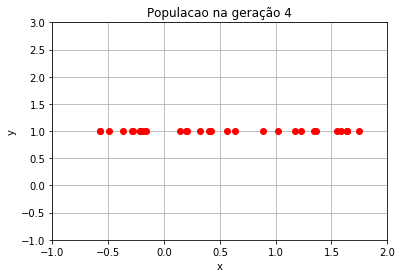

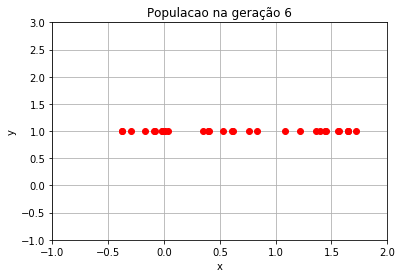

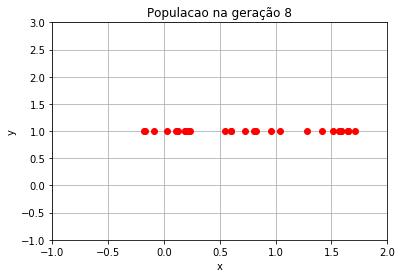

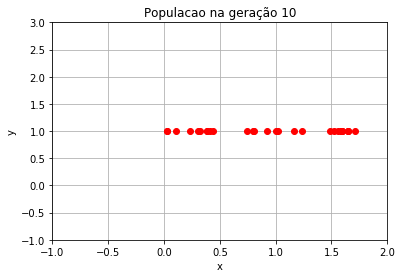

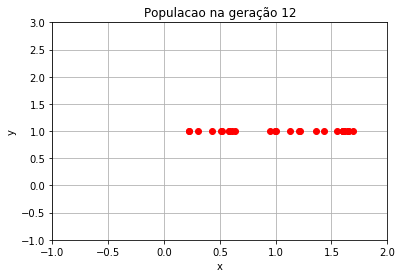

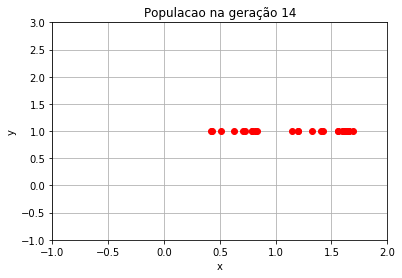

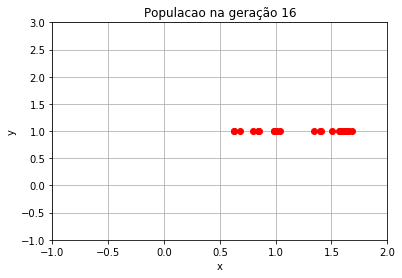

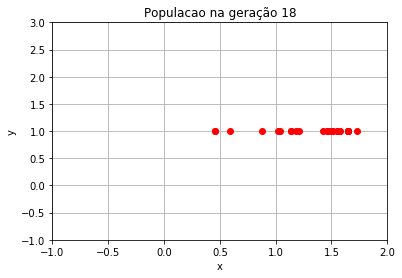

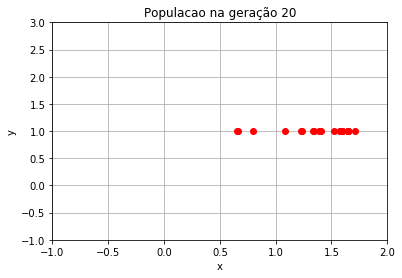

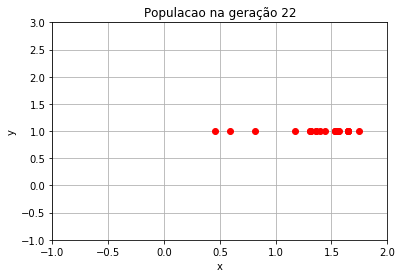

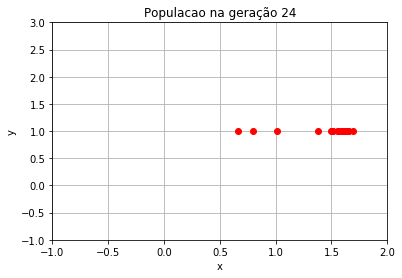

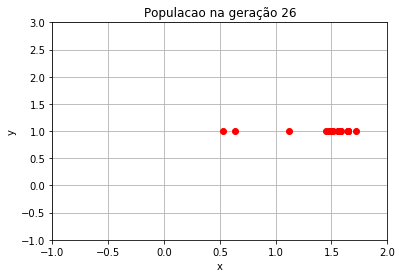

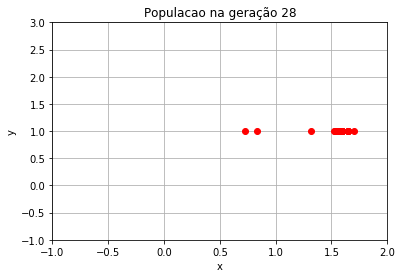

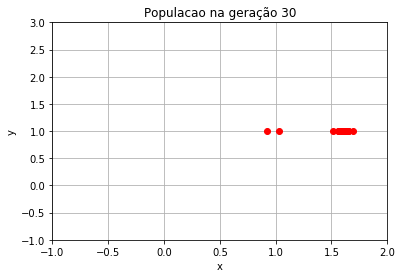

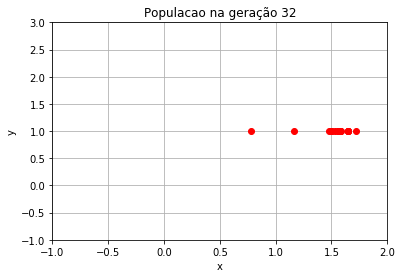

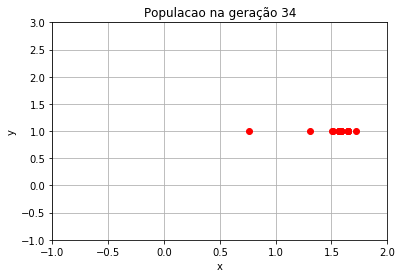

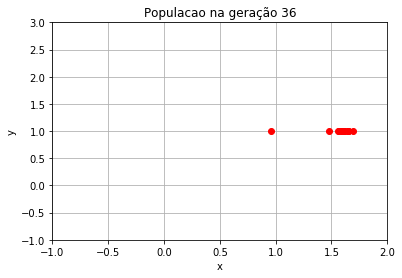

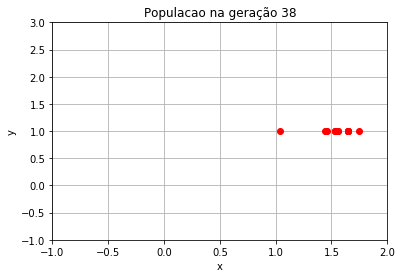

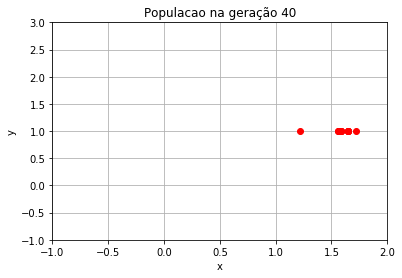

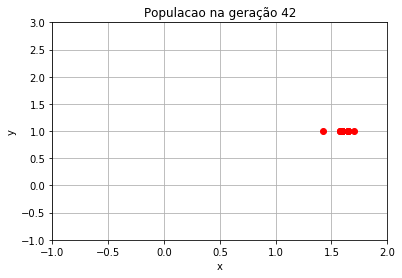

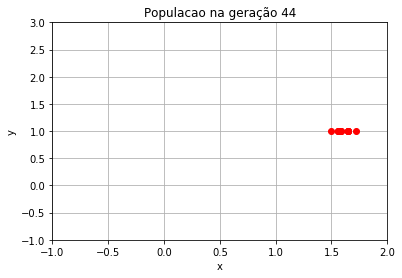

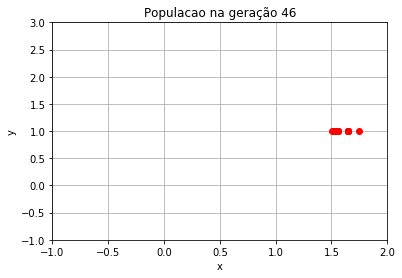

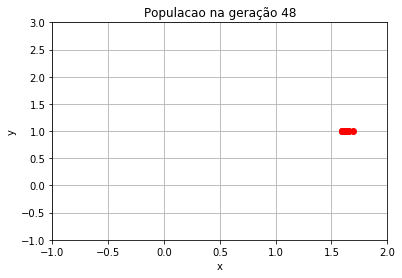

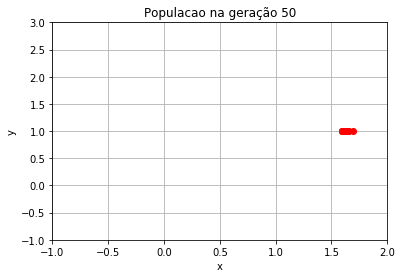

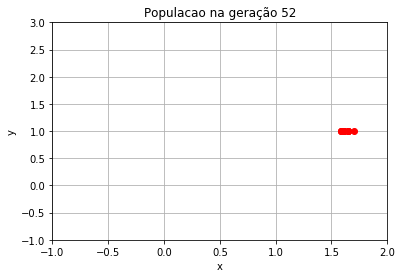

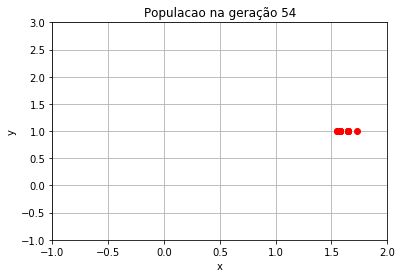

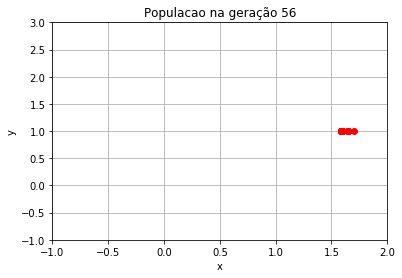

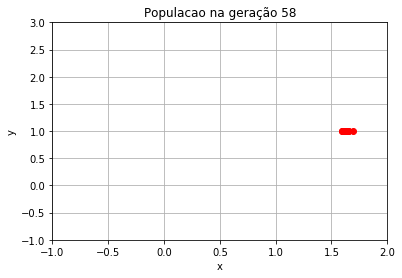

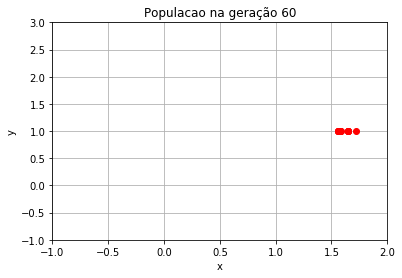

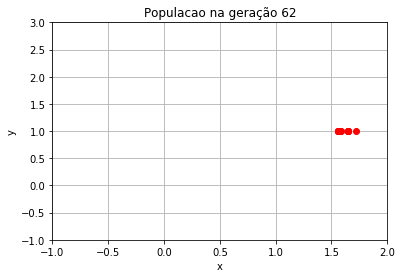

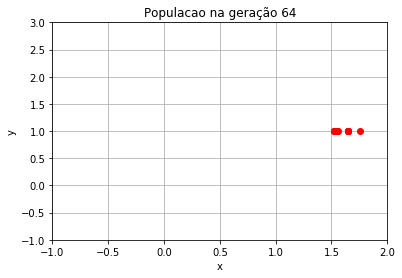

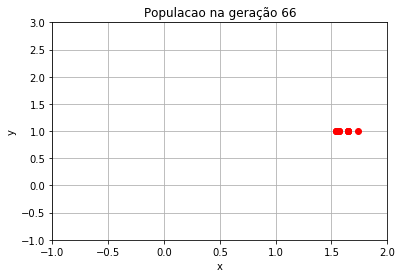

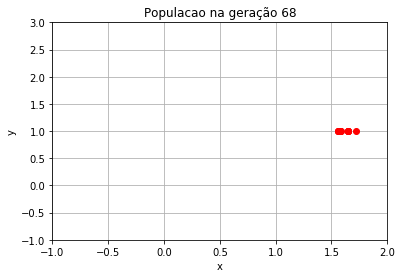

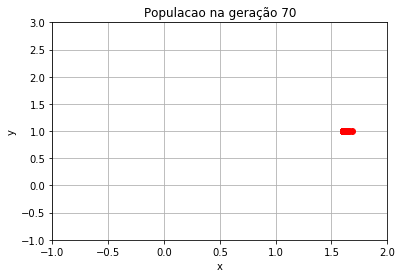

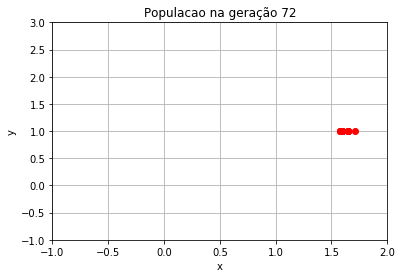

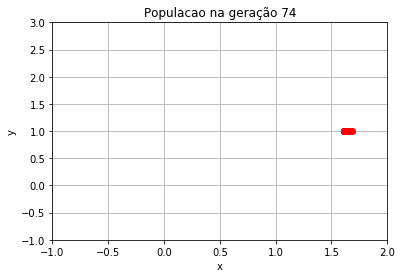

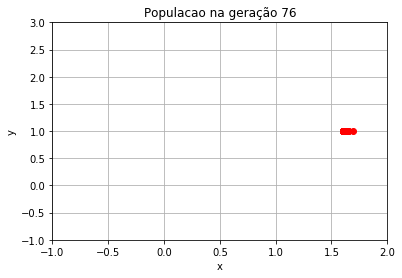

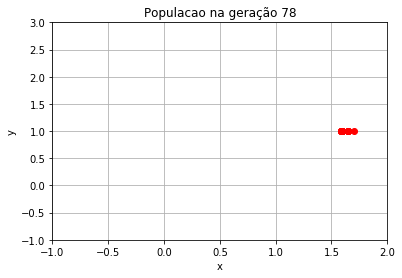

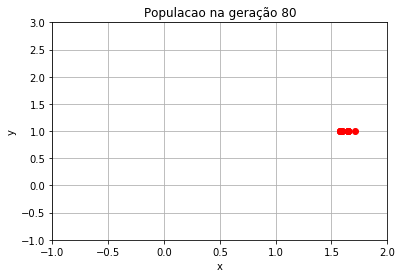

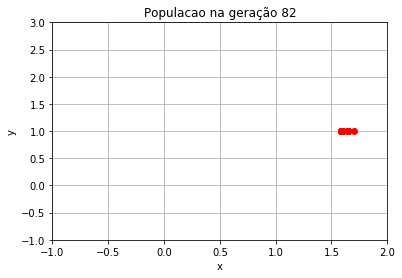

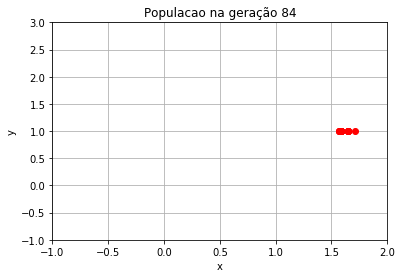

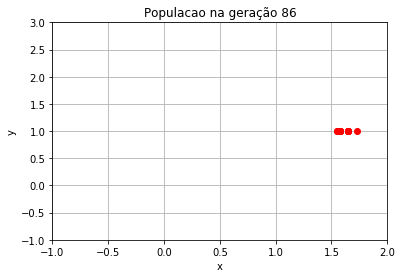

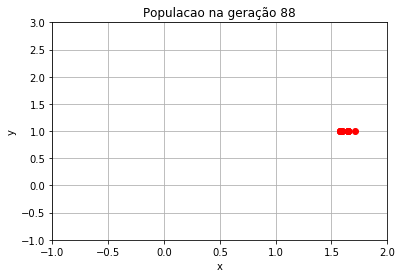

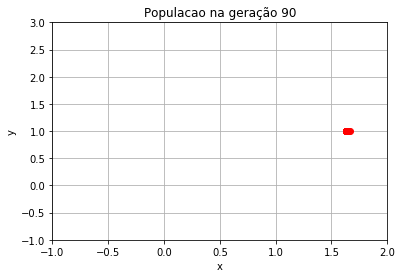

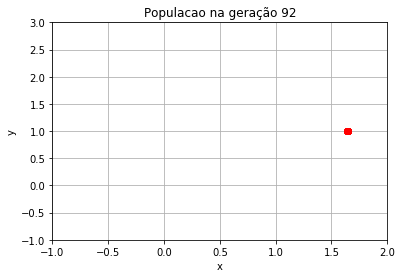

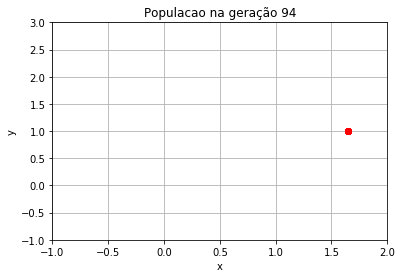

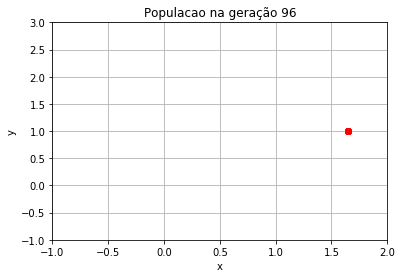

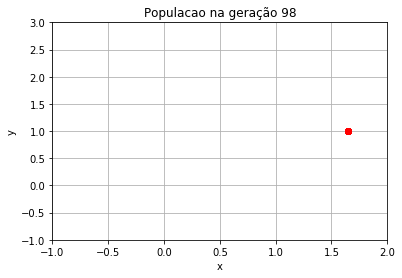

In [133]:

#CÉLULA PSO-MAIN-04
#Loop principal
generation_index = 0
for generation_index in range(0, max_generations) :
        
    if(generation_index % 2 == 0) :
        plot_population(vParticles, generation_index)
        
    vParticles = runEpoch(vParticles)

A convergencia foi atingida na geração: 99
A particula vencedora foi: {'X': 1.6506137632413362, 'XBestFitness': 2.650306929224541}, com aptidão 2.650306929224541
A solução do problema é x=1.6506137632413362


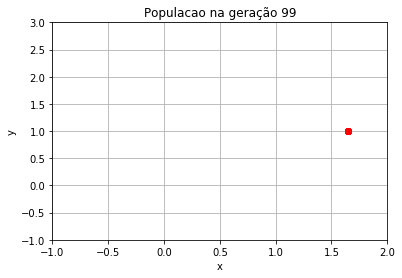

In [134]:

gBest = calcGBest(vParticles)

print('A convergencia foi atingida na geração: {}'.format(generation_index))
print('A particula vencedora foi: {}, com aptidão {}'.format(gBest, gBest['XBestFitness']))
print('A solução do problema é x={}'.format(gBest['X']))

plot_population(vParticles, generation_index)




## Verifique o que acontece com a convergência, caso você reduza a quantidade de épocas de atualização.

#Resposta: Não Converge legal ficando um outlier


{'X': 1.8565033690928776, 'XBestFitness': 2.817890589488547}
[{'X': -0.3069889824130613, 'XBest': -0.3069889824130613, 'VX': 1.5092745558020444}, {'X': -0.4919197242766393, 'XBest': -0.4919197242766393, 'VX': -0.28051272560589}, {'X': -0.9163532084711556, 'XBest': -0.9163532084711556, 'VX': 1.8628255142080716}, {'X': -0.2625352750542912, 'XBest': -0.2625352750542912, 'VX': 1.4972914163826685}, {'X': -0.9978781768474349, 'XBest': -0.9978781768474349, 'VX': -0.34081539208504885}, {'X': -0.2315554587537224, 'XBest': -0.2315554587537224, 'VX': 0.7900845231661842}, {'X': 0.6541089568857403, 'XBest': 0.6541089568857403, 'VX': -0.6363734148750873}, {'X': -0.08150814943401252, 'XBest': -0.08150814943401252, 'VX': -0.9591764661857598}, {'X': 0.829581861612944, 'XBest': 0.829581861612944, 'VX': 1.636391730447846}, {'X': 0.629111126418989, 'XBest': 0.629111126418989, 'VX': 0.11685534360296534}, {'X': 1.291376375787316, 'XBest': 1.291376375787316, 'VX': 1.5125529437600633}, {'X': -0.69655698734786

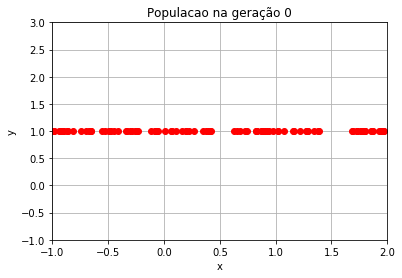

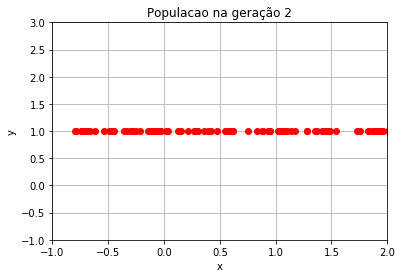

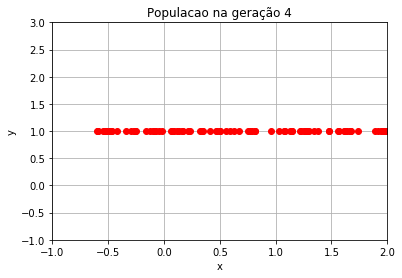

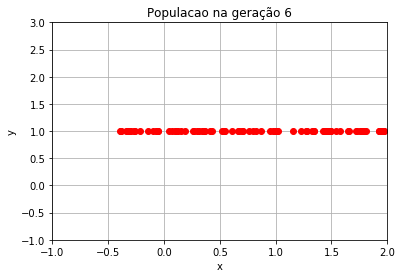

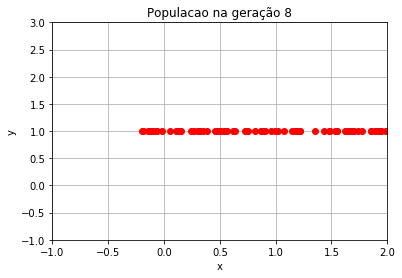

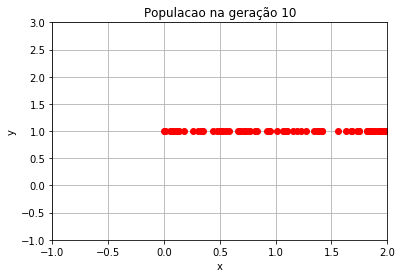

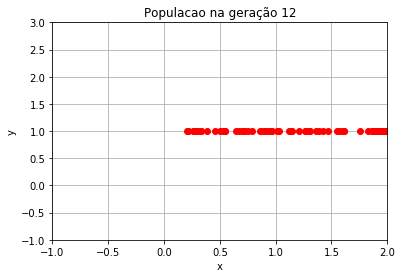

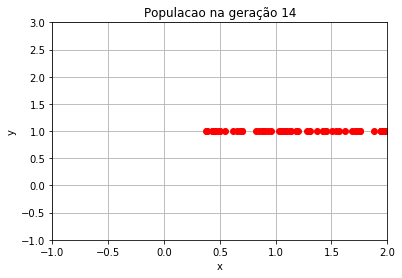

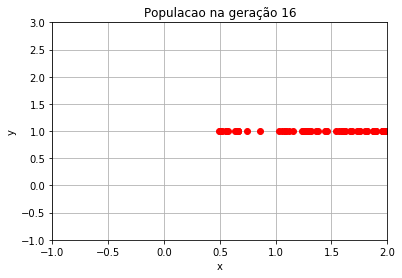

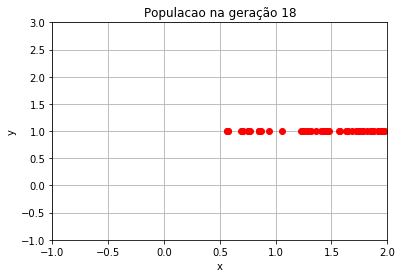

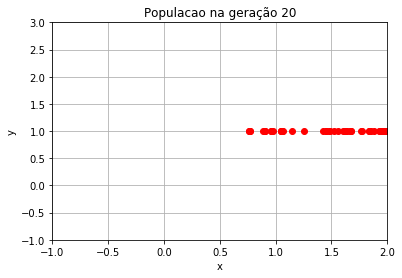

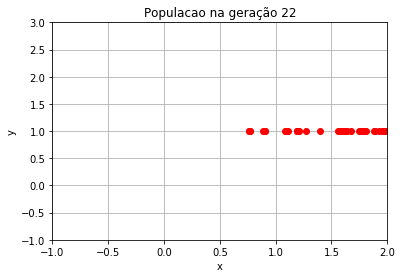

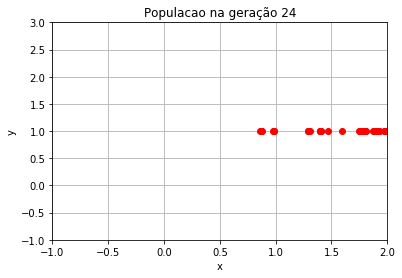

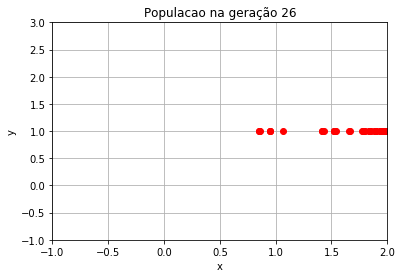

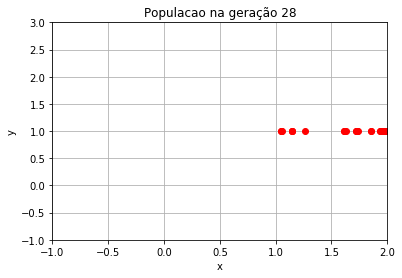

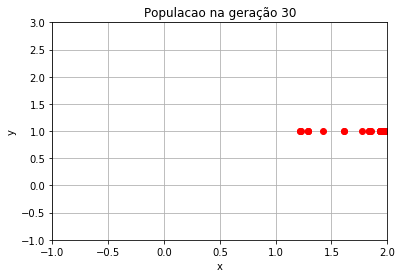

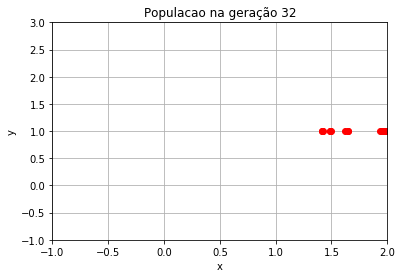

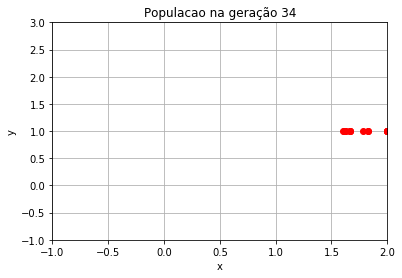

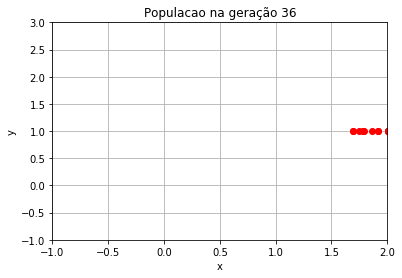

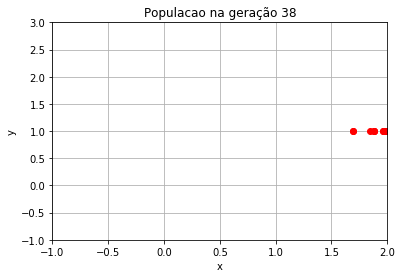

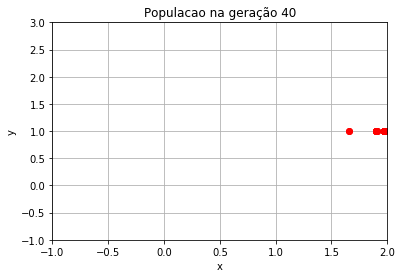

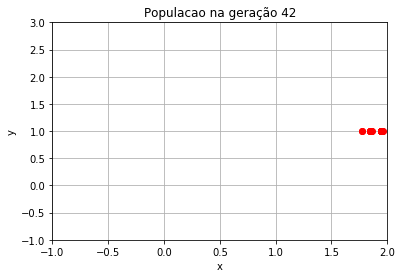

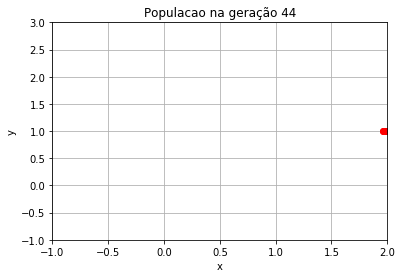

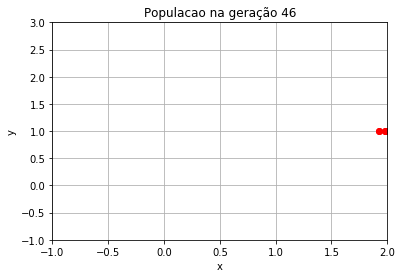

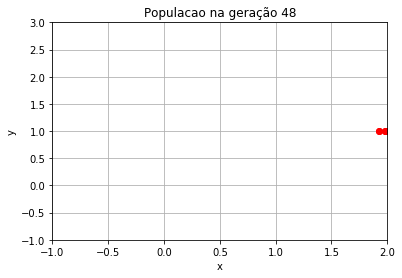

In [137]:
vMax = 0.1
vParticles=[]
#sizepop 100
for _ in range(0, 100):
    x   =  x_min + np.random.random() * (x_max - x_min)
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vParticles.append({'X' : x, 'XBest' : x, 'VX' : vx, })
    
#Calcula pBest
#vParticles = calcPBest(vParticles)

#Calcula gbest
gBest = calcGBest(vParticles)
print(gBest)
print(vParticles)


generation_index = 0
##50 epochs
for generation_index in range(0, 50) :
        
    if(generation_index % 2 == 0) :
        plot_population(vParticles, generation_index)
        
    vParticles = runEpoch(vParticles)

A convergencia foi atingida na geração: 49
A particula vencedora foi: {'X': 1.6499911622895806, 'XBestFitness': 2.6499910986934196}, com aptidão 2.6499910986934196
A solução do problema é x=1.6499911622895806


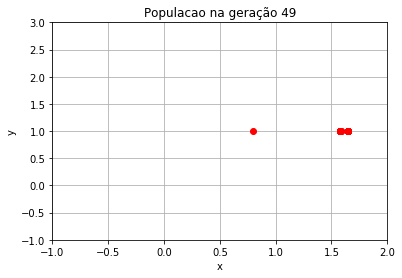

In [136]:
gBest = calcGBest(vParticles)

print('A convergencia foi atingida na geração: {}'.format(generation_index))
print('A particula vencedora foi: {}, com aptidão {}'.format(gBest, gBest['XBestFitness']))
print('A solução do problema é x={}'.format(gBest['X']))

plot_population(vParticles, generation_index)



## Verifique o que acontece com a convergência, caso você AUMENTE as constantes c1, c2 e w.
Resposta: Muda bem o range  e não converge, teria que escalar r1 e r2 o runEpochs pra dar certo e não linearizou

{'X': 1.8390494250336, 'XBestFitness': 2.731291435023927}
[{'X': -0.8340322810869042, 'XBest': -0.8340322810869042, 'VX': 0.3649374314620708}, {'X': -0.45173287622541114, 'XBest': -0.45173287622541114, 'VX': 1.86533532453344}, {'X': 1.098903845022634, 'XBest': 1.098903845022634, 'VX': 1.383970927618992}, {'X': 1.704193842394996, 'XBest': 1.704193842394996, 'VX': -0.9846027831578859}, {'X': -0.6728986859179222, 'XBest': -0.6728986859179222, 'VX': 0.06845427037722707}, {'X': 0.8348214091805541, 'XBest': 0.8348214091805541, 'VX': 1.368118609977527}, {'X': 0.8096139270541245, 'XBest': 0.8096139270541245, 'VX': 0.6444526069481338}, {'X': 0.4182828490249477, 'XBest': 0.4182828490249477, 'VX': 1.9501660187883716}, {'X': 1.5192589774887733, 'XBest': 1.5192589774887733, 'VX': 0.7423281245290898}, {'X': 0.4291334803983229, 'XBest': 0.4291334803983229, 'VX': -0.26166017289356325}, {'X': 0.8994101324807304, 'XBest': 0.8994101324807304, 'VX': 0.3157424540495457}, {'X': 1.3860053952205127, 'XBest': 

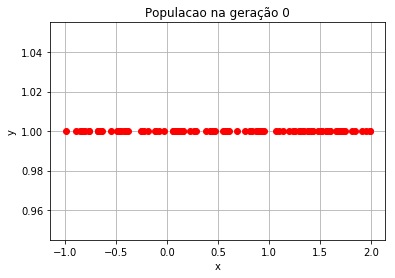

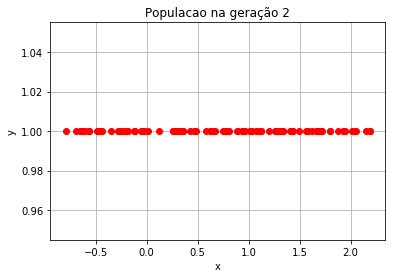

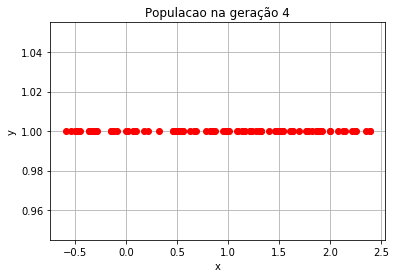

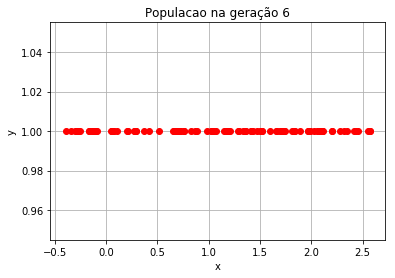

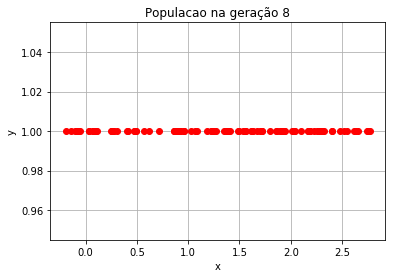

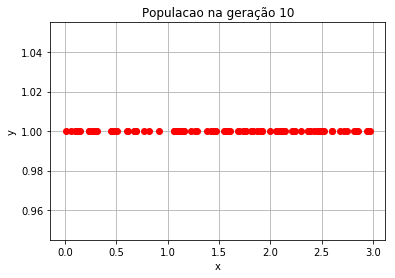

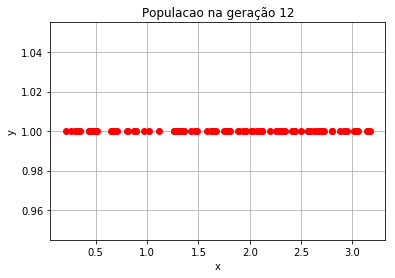

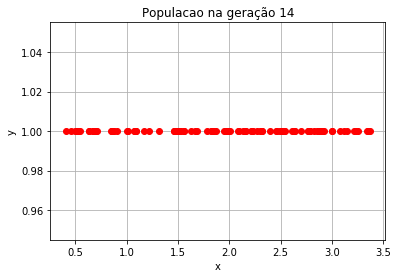

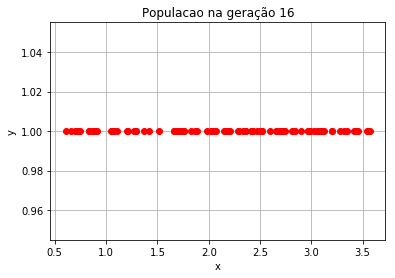

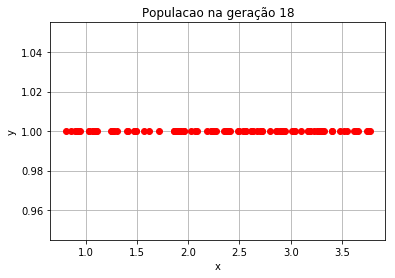

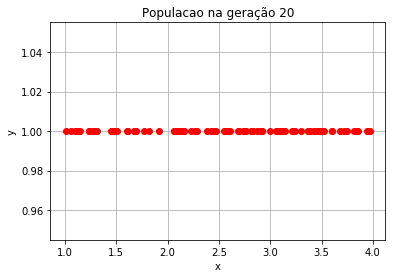

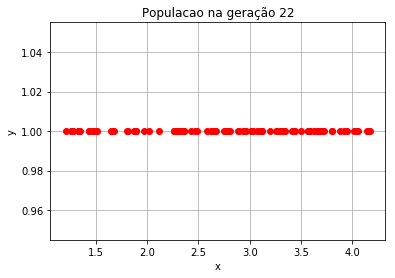

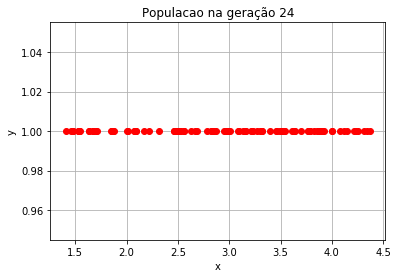

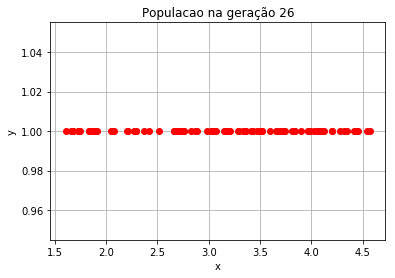

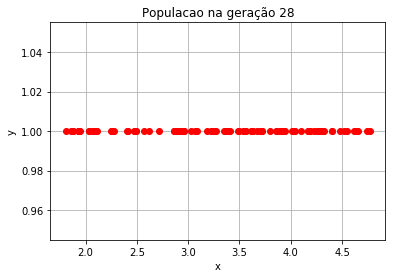

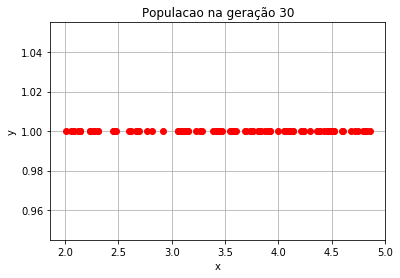

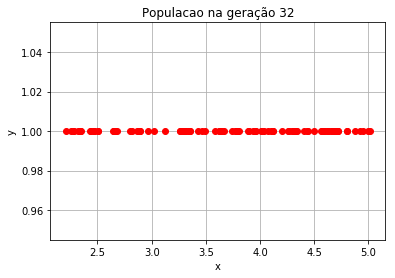

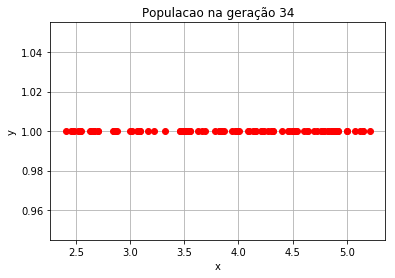

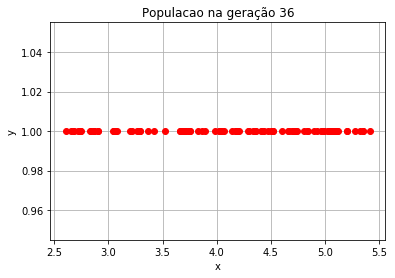

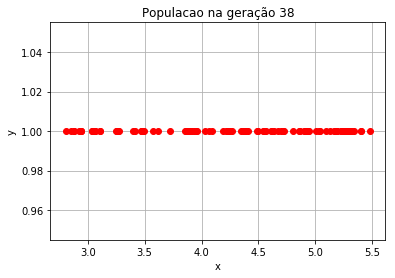

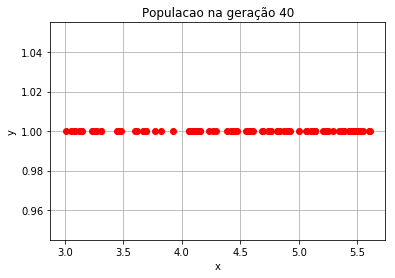

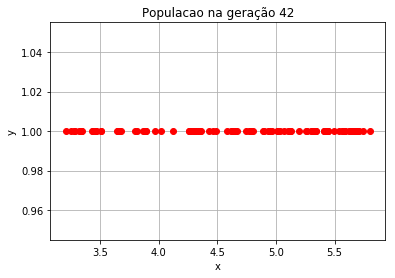

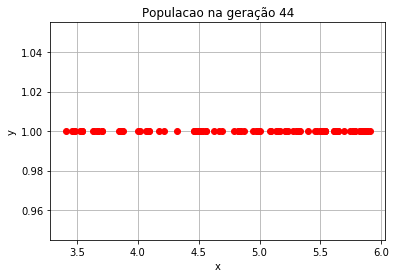

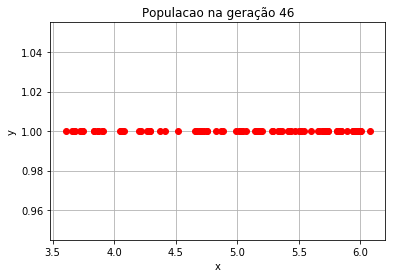

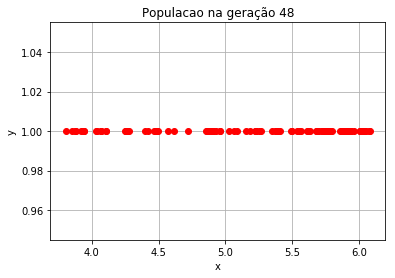

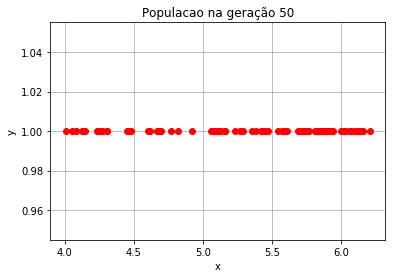

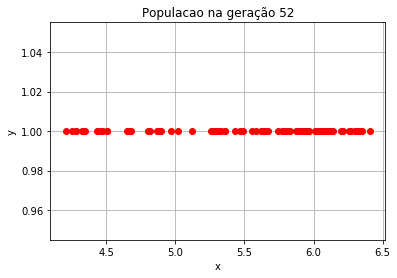

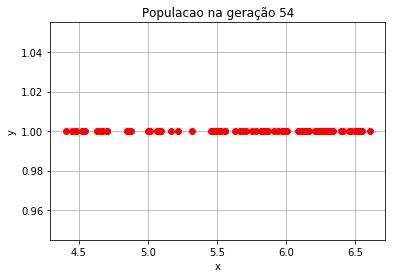

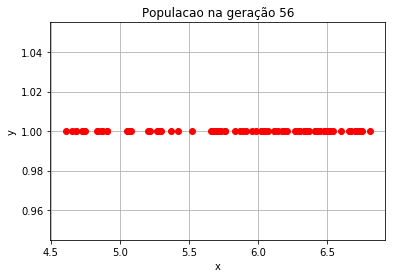

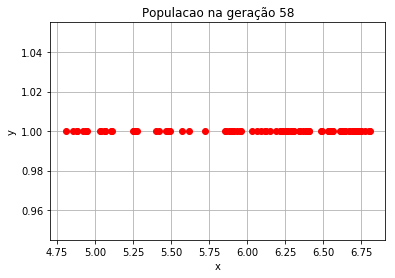

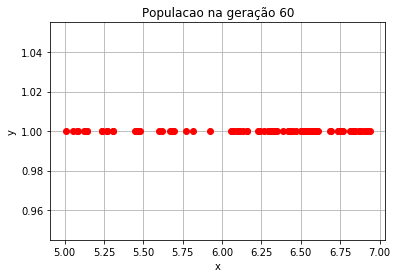

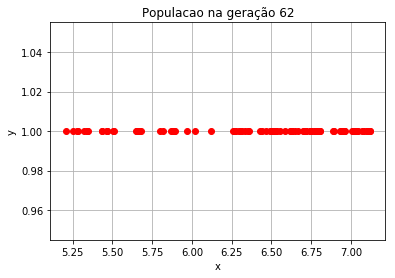

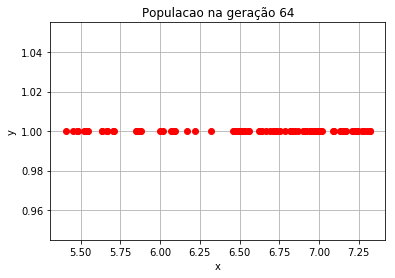

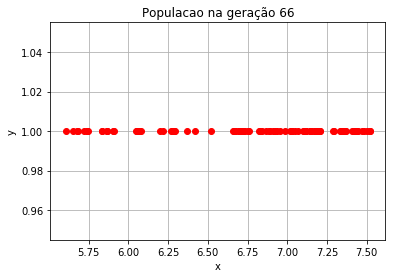

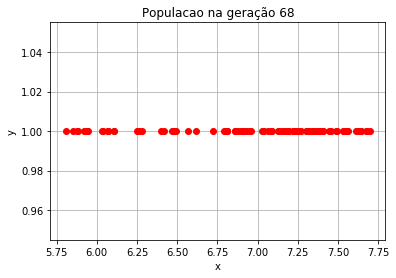

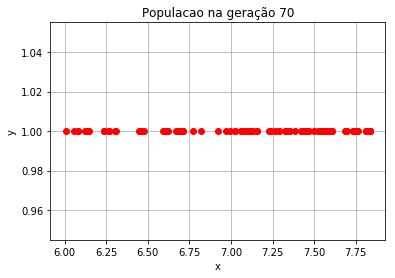

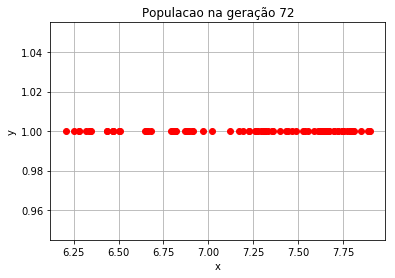

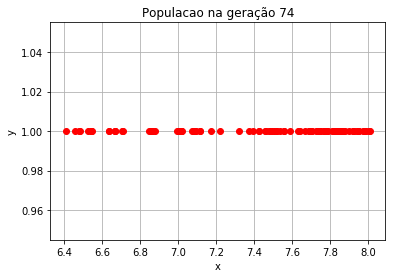

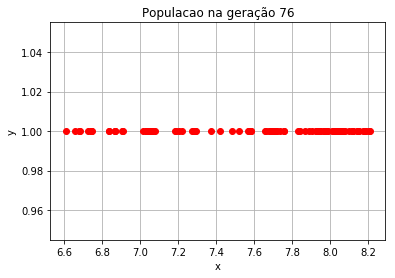

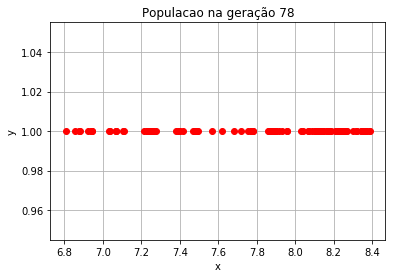

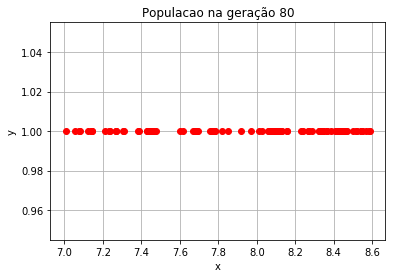

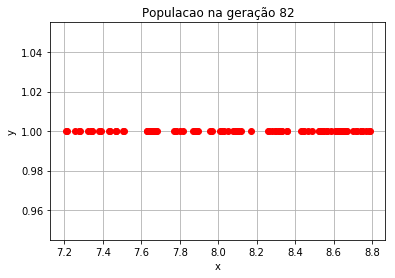

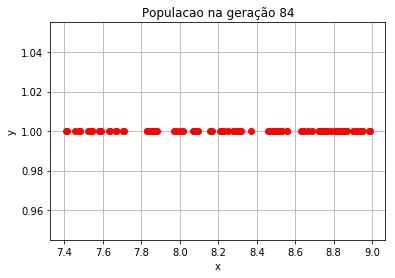

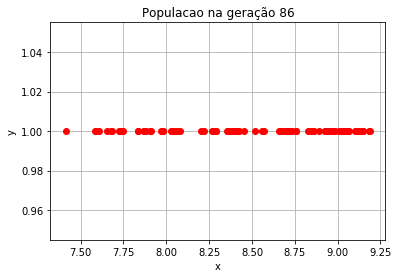

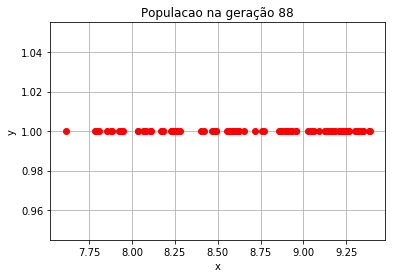

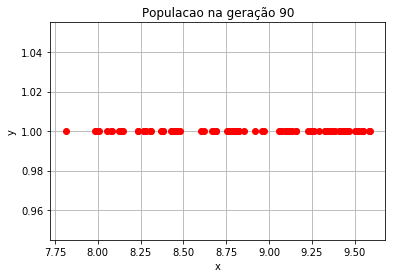

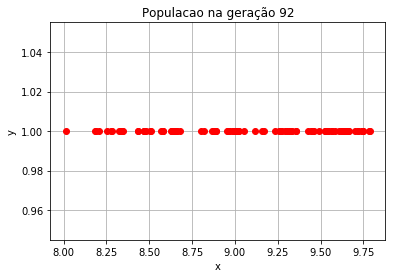

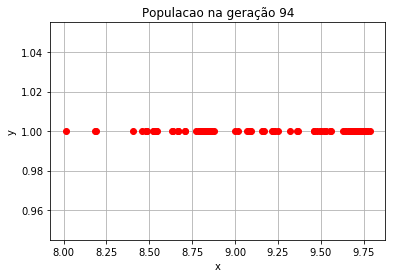

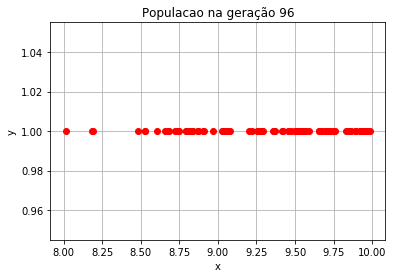

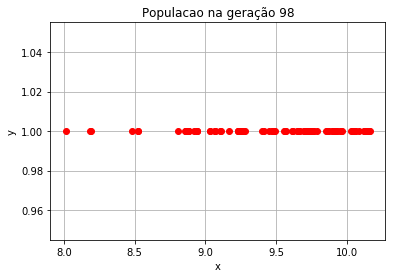

In [149]:
def plot_population2(P, generation):
    
    # IMPLEMENTE O CODIGO
    # 1. DEFINA O DOMINIO DA FUNCAO
    # 2. CALCULE O FITNESS DE TODAS AS PARTICULAS
    # 3. PLOTE O GRAFICO     
    xmin =-1
    xmax = 2
    ymin =-1
    ymax = 3
    
    xarry = []
    yarry = []
    for particle in vParticles:
        x = particle['X']
        y = fitness(generation)
        xarry.append(x)
        yarry.append(y)
    
    
    plt.figure()
    plt.plot(xarry,yarry,'ro')
    sTitle = ('Populacao na geração {}'.format(generation))
    #plt.axis([xmin, xmax, ymin, ymax])
    plt.title(sTitle)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()





#CÉLULA PSO-MAIN-01
#Parâmetros
size_pop   = 100
max_generations = 100

#Limites do dominio de definição
x_min = -1
x_max =  2

y_min = -1
y_max =  3

gBest = {'XGBest' : 0, 'XGBestFitness' : 0}
vParticles = []

deltaT = 1
c1 = 2
c2 = 3
w  = 4

vMax = 0.1 #limitação de velocidade



vParticles=[]

#sizepop 100
for _ in range(0, size_pop):
    x   =  x_min + np.random.random() * (x_max - x_min)
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vParticles.append({'X' : x, 'XBest' : x, 'VX' : vx, })
    
#Calcula pBest
#vParticles = calcPBest(vParticles)

#Calcula gbest
gBest = calcGBest(vParticles)
print(gBest)
print(vParticles)


generation_index = 0
##50 epochs
for generation_index in range(0, max_generations) :
        
    if(generation_index % 2 == 0) :
        plot_population2(vParticles, generation_index)
        
    vParticles = runEpoch(vParticles)

A convergencia foi atingida na geração: 99
A particula vencedora foi: {'X': 10.248801666331413, 'XBestFitness': 11.24153981977667}, com aptidão 11.24153981977667
A solução do problema é x=10.248801666331413


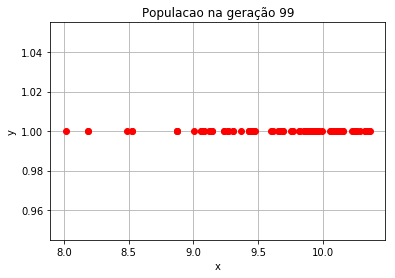

In [150]:
gBest = calcGBest(vParticles)

print('A convergencia foi atingida na geração: {}'.format(generation_index))
print('A particula vencedora foi: {}, com aptidão {}'.format(gBest, gBest['XBestFitness']))
print('A solução do problema é x={}'.format(gBest['X']))

plot_population2(vParticles, generation_index)


## Verifique o que acontece com a convergência, fazendo w=0. O que isso significa?
Resposta: Nova velocidade sempre sera zero.


## Verifique o que acontece com a convergência, caso você faça c1 muito maior que c2 (c1 >> c2).

Resposta Não Converge fica espaçado.

{'X': 1.643281178505735, 'XBestFitness': 2.606809581772808}
[{'X': 0.9189005823125027, 'XBest': 0.9189005823125027, 'VX': 0.633509379517132}, {'X': 0.17343690263341238, 'XBest': 0.17343690263341238, 'VX': -0.8434014133092086}, {'X': 1.6990745895809787, 'XBest': 1.6990745895809787, 'VX': 1.4449344491225937}, {'X': 0.7227729292059295, 'XBest': 0.7227729292059295, 'VX': -0.3475146469831266}, {'X': 0.6904679718567692, 'XBest': 0.6904679718567692, 'VX': 0.6102887863755782}, {'X': 0.8527235771529671, 'XBest': 0.8527235771529671, 'VX': 0.7064385913912874}, {'X': 1.362118141038148, 'XBest': 1.362118141038148, 'VX': 1.0102872970540941}, {'X': 1.6387405720413994, 'XBest': 1.6387405720413994, 'VX': 0.8724103597677453}, {'X': 1.7920748647820743, 'XBest': 1.7920748647820743, 'VX': 0.06013192685553714}, {'X': 1.6852932757339207, 'XBest': 1.6852932757339207, 'VX': 1.4768555618212638}, {'X': -0.7123481237753098, 'XBest': -0.7123481237753098, 'VX': -0.7388271658979992}, {'X': 1.5955305144231167, 'XBest

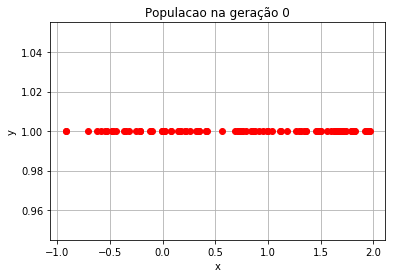

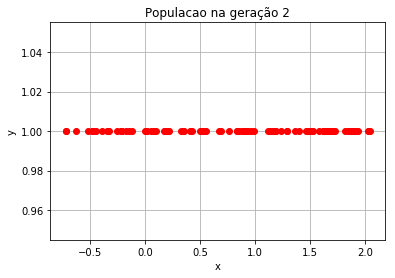

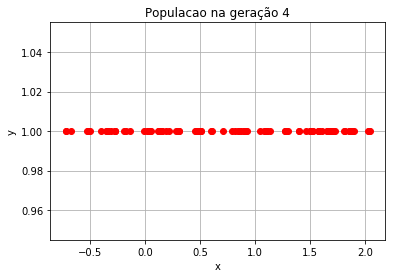

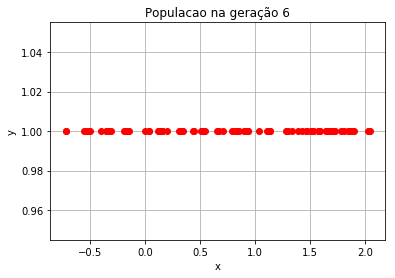

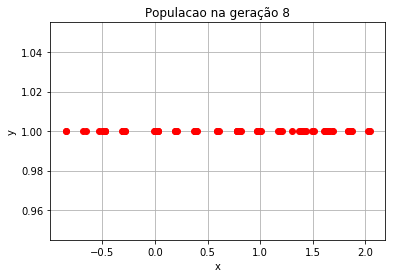

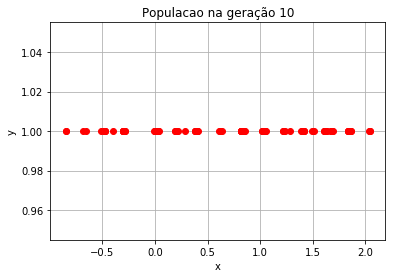

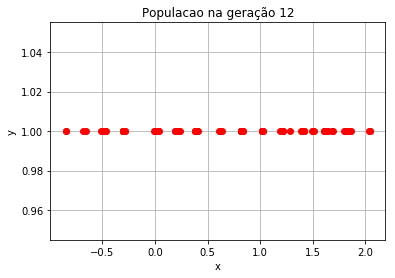

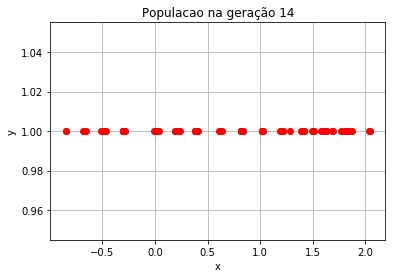

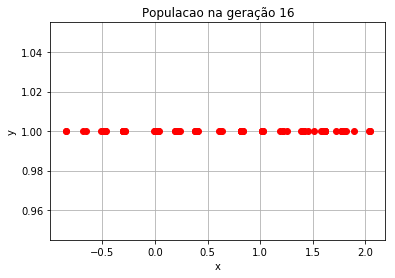

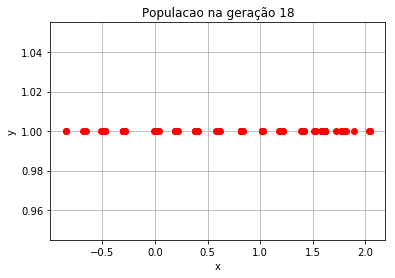

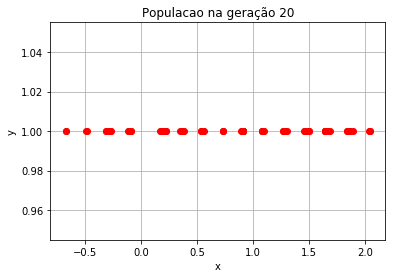

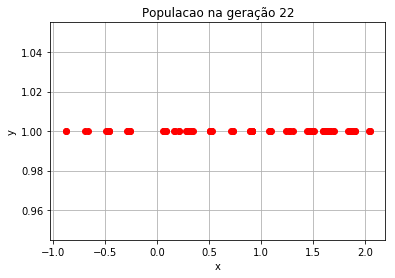

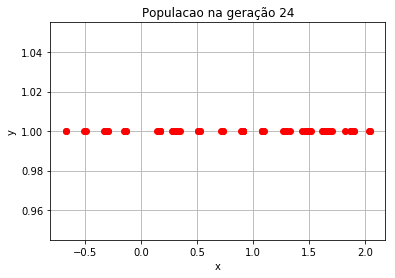

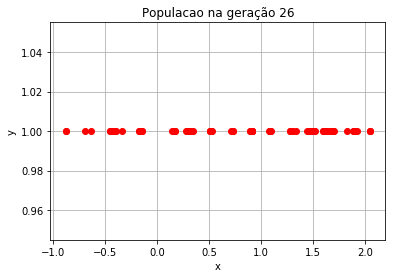

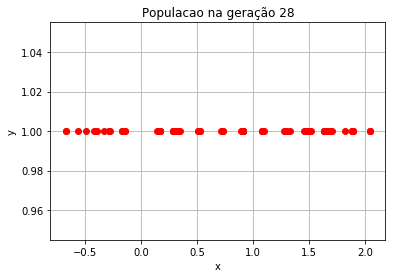

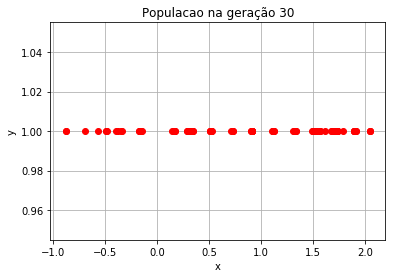

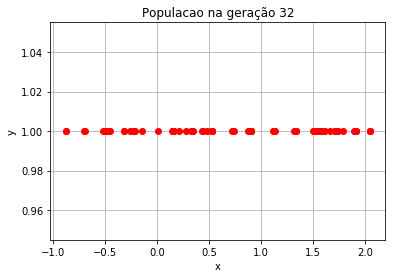

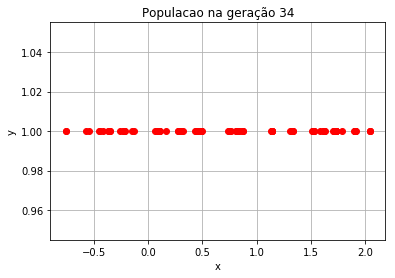

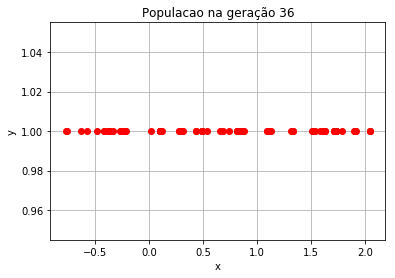

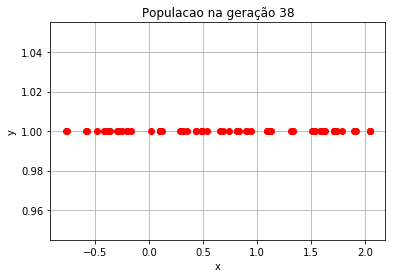

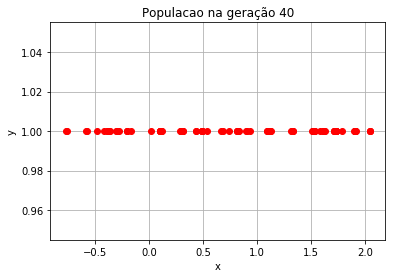

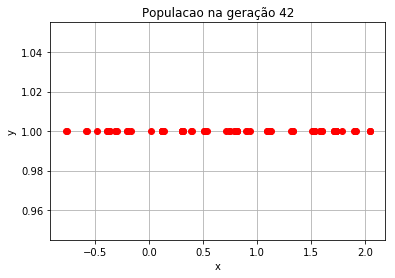

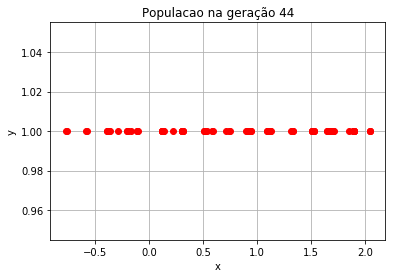

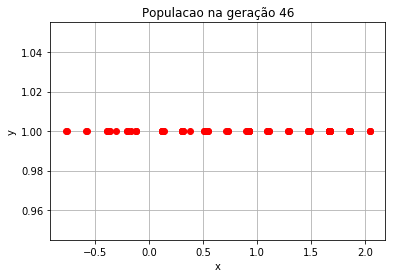

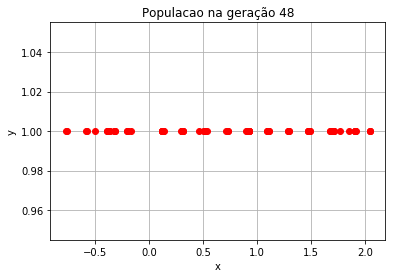

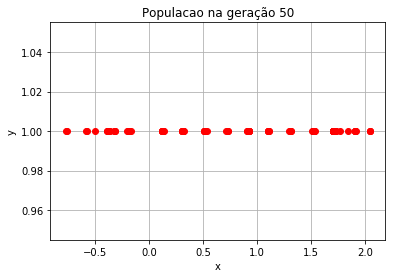

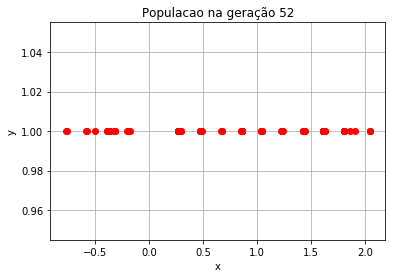

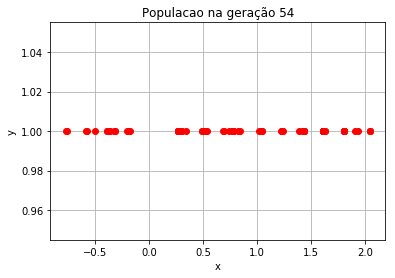

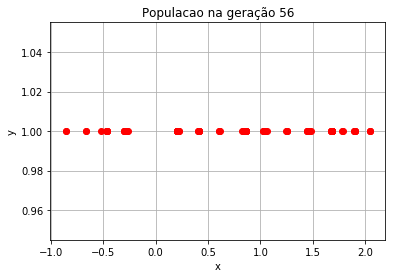

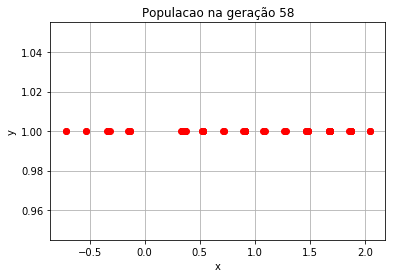

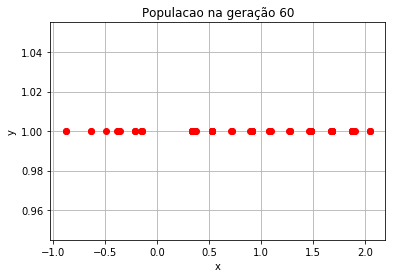

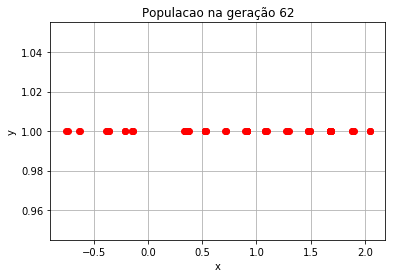

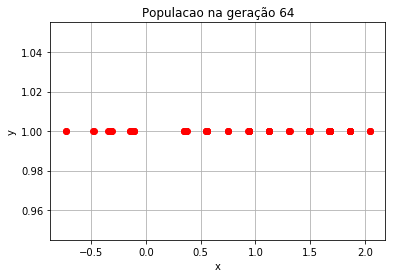

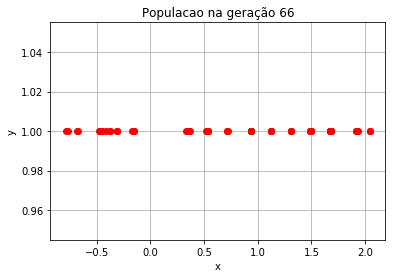

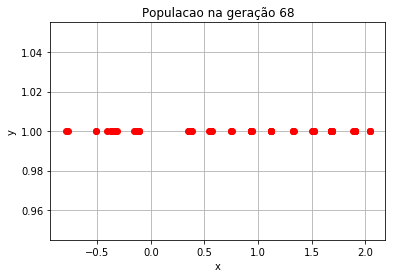

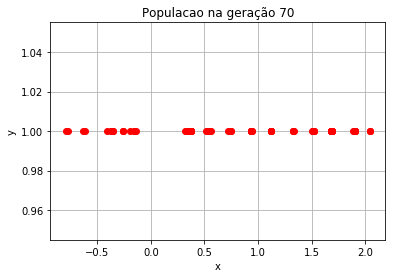

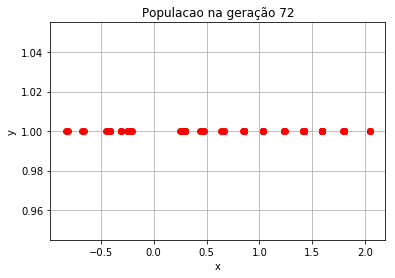

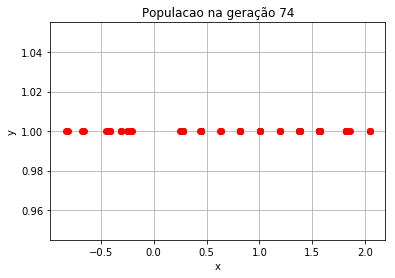

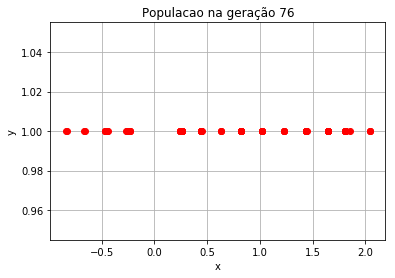

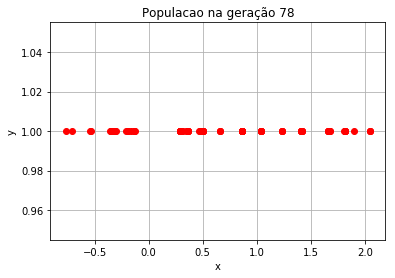

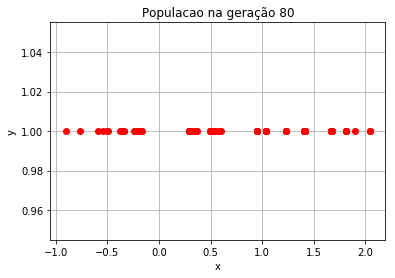

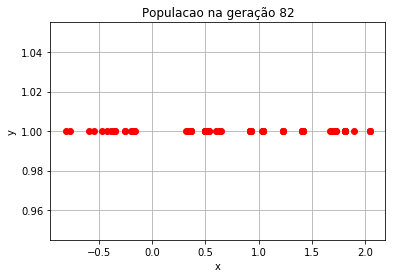

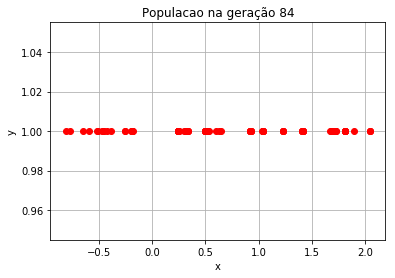

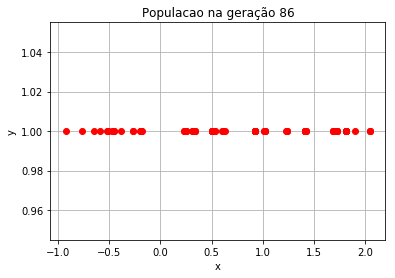

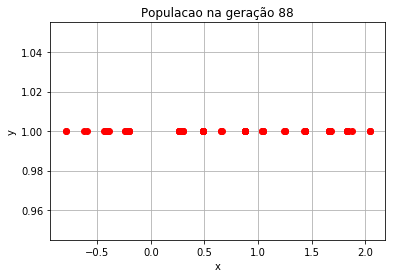

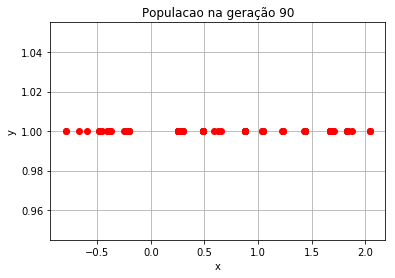

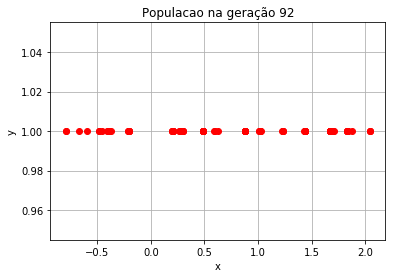

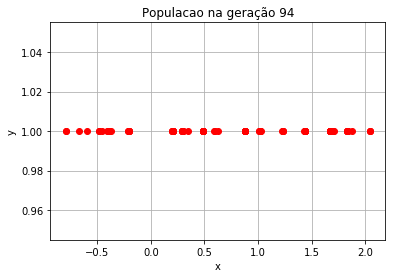

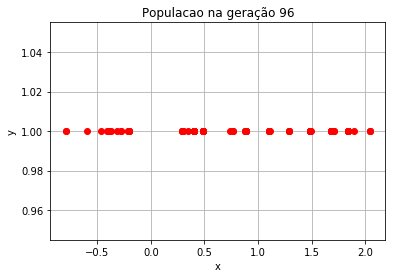

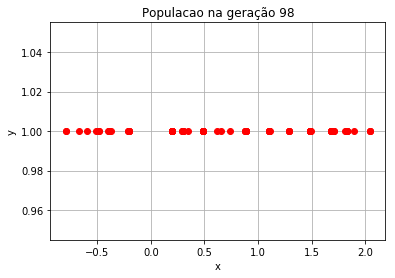

In [151]:
#CÉLULA PSO-MAIN-01
#Parâmetros
size_pop   = 100
max_generations = 100

#Limites do dominio de definição
x_min = -1
x_max =  2

y_min = -1
y_max =  3

gBest = {'XGBest' : 0, 'XGBestFitness' : 0}
vParticles = []

deltaT = 1
c1 = 10
c2 = 0.1
w  = 0.1

vMax = 0.1 #limitação de velocidade



vParticles=[]

#sizepop 100
for _ in range(0, size_pop):
    x   =  x_min + np.random.random() * (x_max - x_min)
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vParticles.append({'X' : x, 'XBest' : x, 'VX' : vx, })
    
#Calcula pBest
#vParticles = calcPBest(vParticles)

#Calcula gbest
gBest = calcGBest(vParticles)
print(gBest)
print(vParticles)


generation_index = 0
##50 epochs
for generation_index in range(0, max_generations) :
        
    if(generation_index % 2 == 0) :
        plot_population2(vParticles, generation_index)
        
    vParticles = runEpoch(vParticles)

A convergencia foi atingida na geração: 99
A particula vencedora foi: {'X': 2.045884727682803, 'XBestFitness': 3.0288104216772505}, com aptidão 3.0288104216772505
A solução do problema é x=2.045884727682803


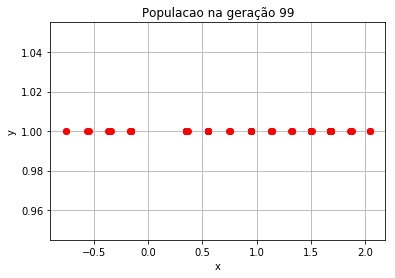

In [152]:
gBest = calcGBest(vParticles)

print('A convergencia foi atingida na geração: {}'.format(generation_index))
print('A particula vencedora foi: {}, com aptidão {}'.format(gBest, gBest['XBestFitness']))
print('A solução do problema é x={}'.format(gBest['X']))

plot_population2(vParticles, generation_index)



## Verifique o que acontece com a convergência, caso você faça c1 muito menor que c2 (c1 << c2).
Resposta: Faz uma convergencia lateral uniforme até.

{'X': 1.8519039264977133, 'XBestFitness': 2.848592164833943}
[{'X': -0.28320867326978105, 'XBest': -0.28320867326978105, 'VX': 1.662451650770831}, {'X': 0.7919128693358486, 'XBest': 0.7919128693358486, 'VX': 0.22648572834182024}, {'X': 0.3698260219219536, 'XBest': 0.3698260219219536, 'VX': 1.802979364334389}, {'X': 1.4088681069657154, 'XBest': 1.4088681069657154, 'VX': 0.8036455722780627}, {'X': 0.04753137506655536, 'XBest': 0.04753137506655536, 'VX': 0.030285001598208572}, {'X': 1.4542089449537938, 'XBest': 1.4542089449537938, 'VX': -0.9211076364219934}, {'X': 0.8827343546522011, 'XBest': 0.8827343546522011, 'VX': -0.7507187542141764}, {'X': 0.9900075377590509, 'XBest': 0.9900075377590509, 'VX': 1.9894546458269065}, {'X': 0.5176563994527394, 'XBest': 0.5176563994527394, 'VX': 0.03458389714308674}, {'X': -0.8423180299966214, 'XBest': -0.8423180299966214, 'VX': -0.9073146859575916}, {'X': -0.27624687066350184, 'XBest': -0.27624687066350184, 'VX': -0.05455504468748862}, {'X': 1.954438071

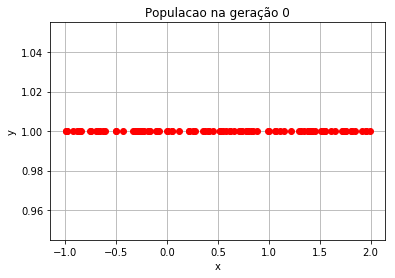

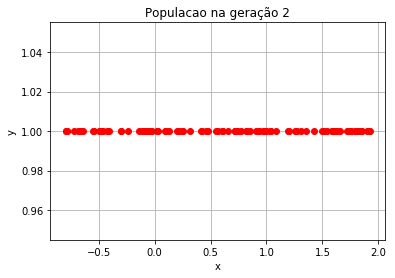

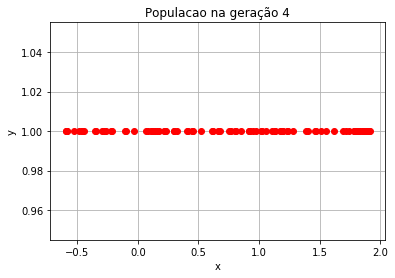

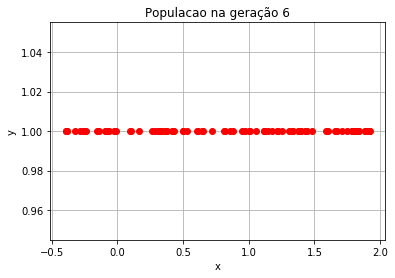

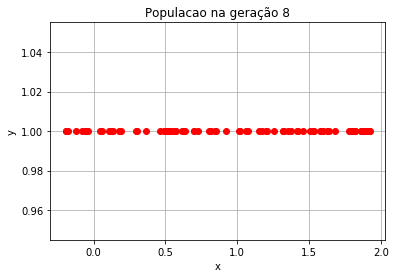

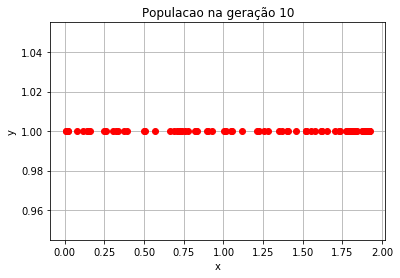

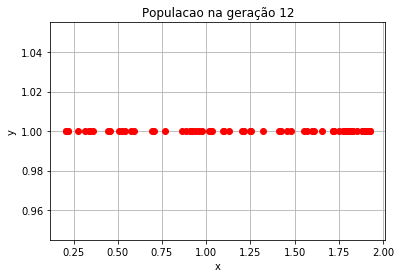

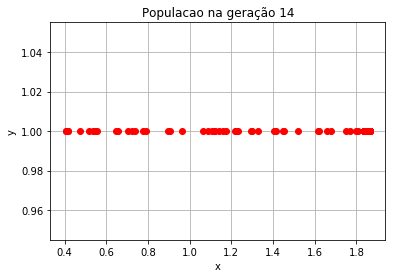

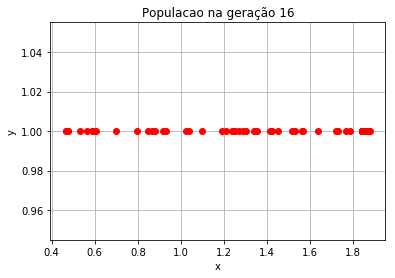

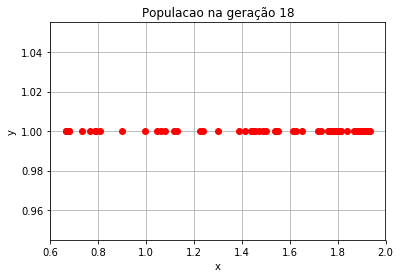

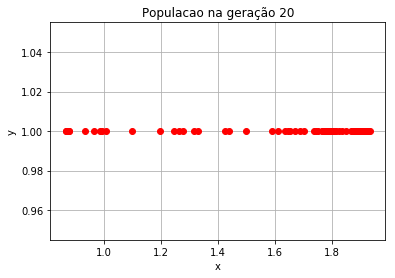

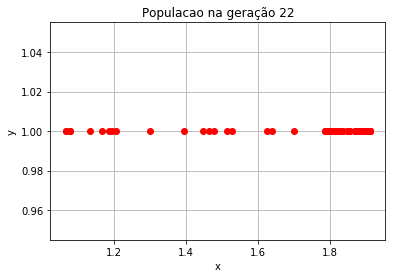

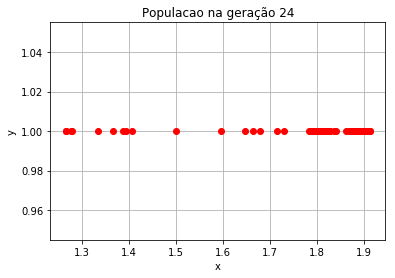

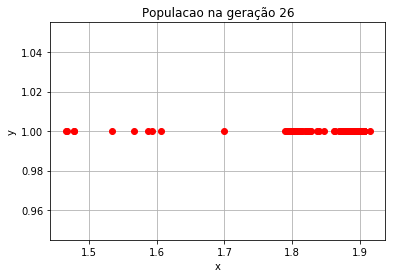

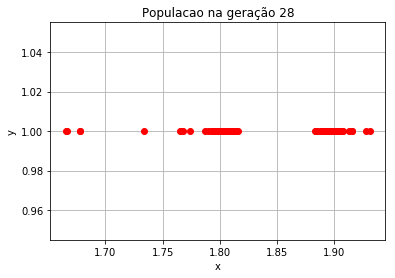

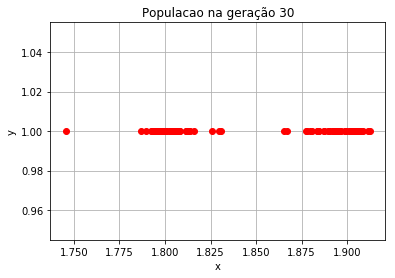

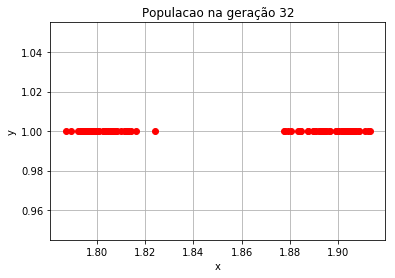

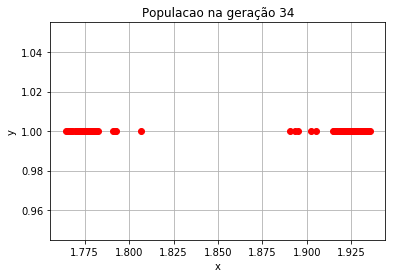

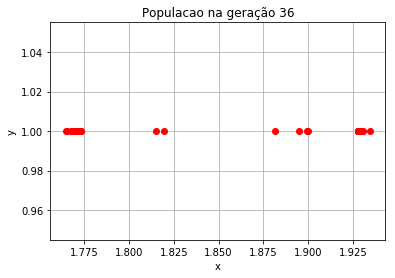

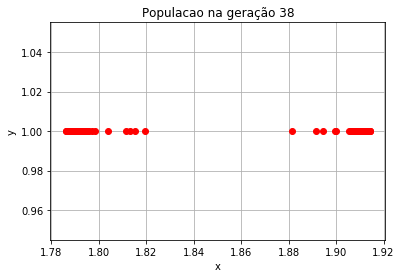

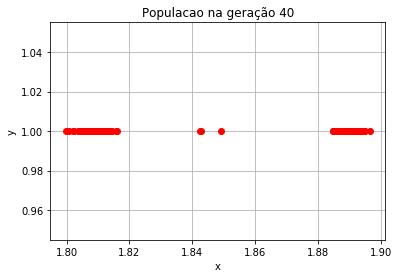

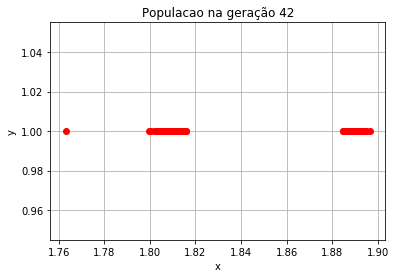

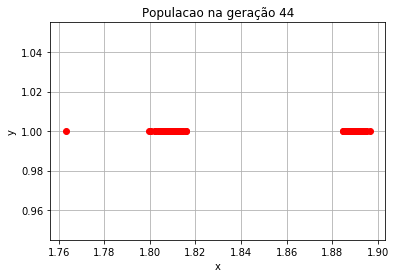

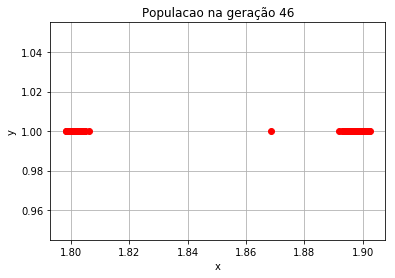

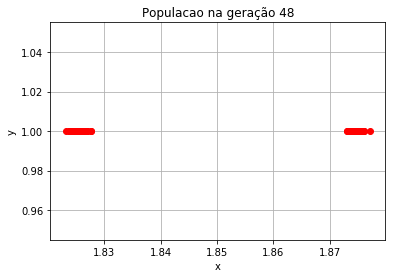

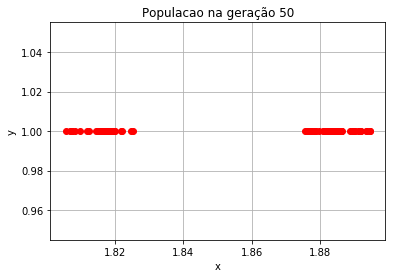

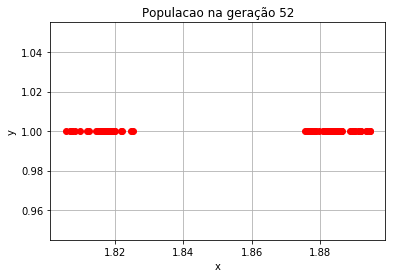

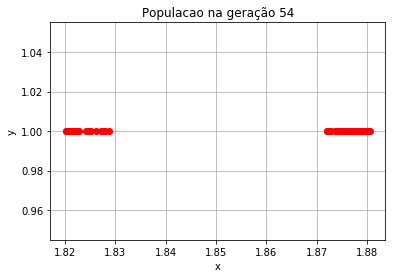

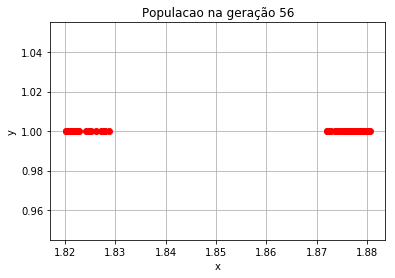

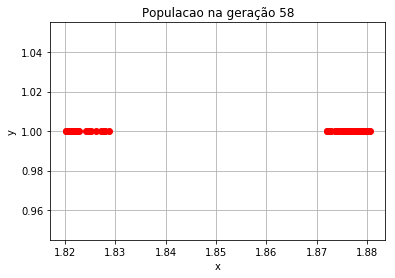

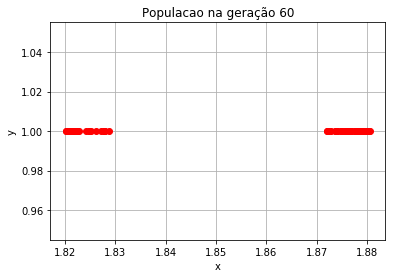

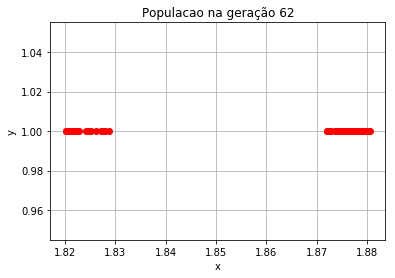

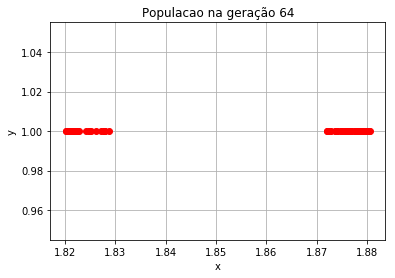

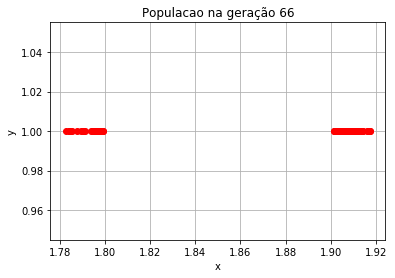

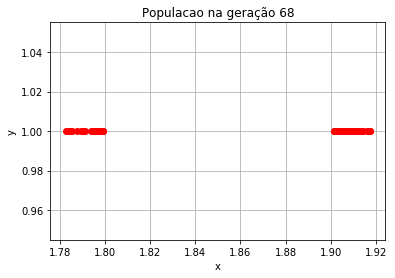

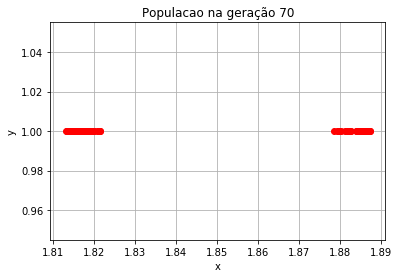

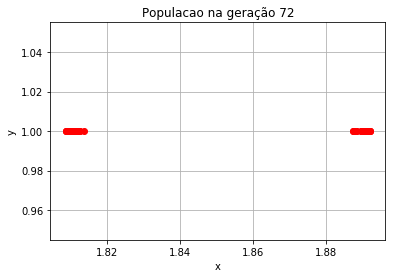

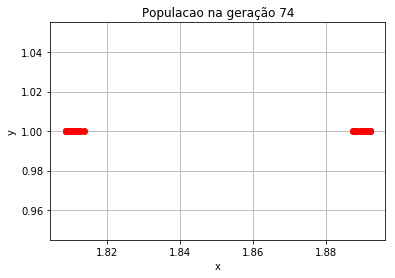

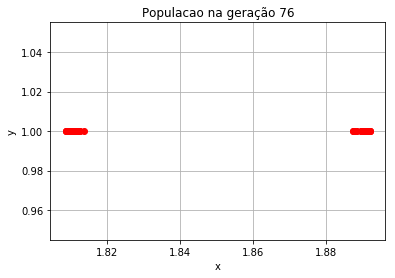

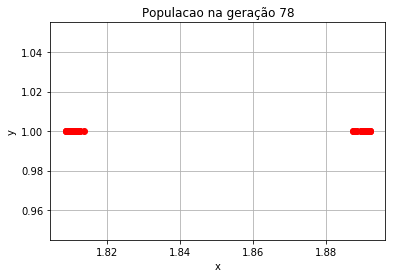

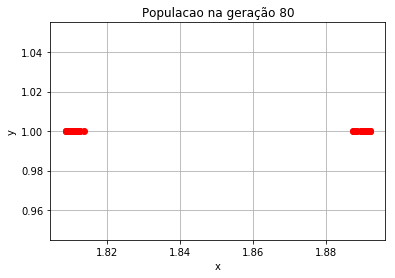

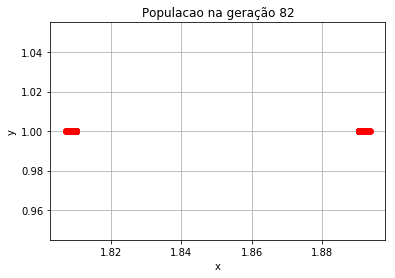

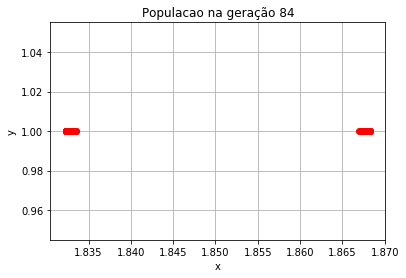

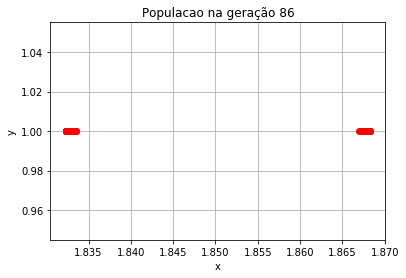

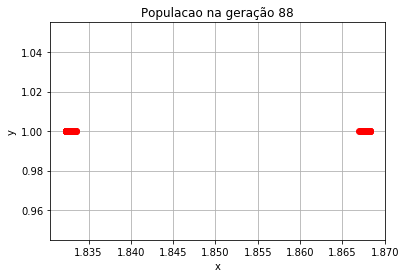

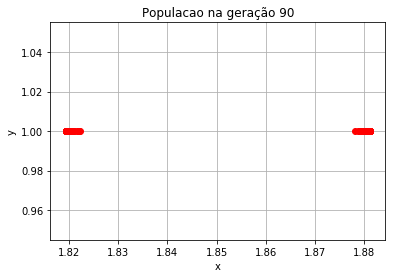

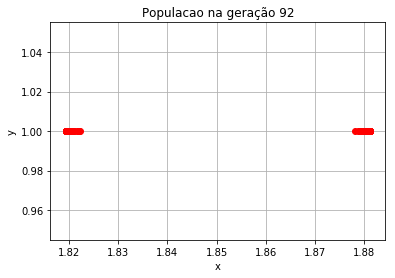

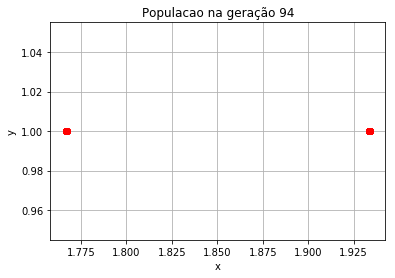

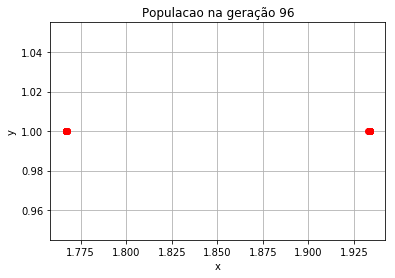

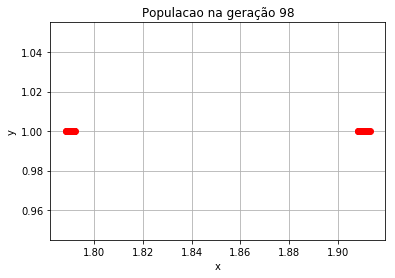

In [154]:
#CÉLULA PSO-MAIN-01
#Parâmetros
size_pop   = 100
max_generations = 100

#Limites do dominio de definição
x_min = -1
x_max =  2

y_min = -1
y_max =  3

gBest = {'XGBest' : 0, 'XGBestFitness' : 0}
vParticles = []

deltaT = 1
c1 = 0.1
c2 = 10
w  = 0.1

vMax = 0.1 #limitação de velocidade



vParticles=[]

#sizepop 100
for _ in range(0, size_pop):
    x   =  x_min + np.random.random() * (x_max - x_min)
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vParticles.append({'X' : x, 'XBest' : x, 'VX' : vx, })
    
#Calcula pBest
#vParticles = calcPBest(vParticles)

#Calcula gbest
gBest = calcGBest(vParticles)
print(gBest)
print(vParticles)


generation_index = 0
##50 epochs
for generation_index in range(0, max_generations) :
        
    if(generation_index % 2 == 0) :
        plot_population2(vParticles, generation_index)
        
    vParticles = runEpoch(vParticles)

A convergencia foi atingida na geração: 99
A particula vencedora foi: {'X': 1.850283123403056, 'XBestFitness': 2.8502099325829278}, com aptidão 2.8502099325829278
A solução do problema é x=1.850283123403056


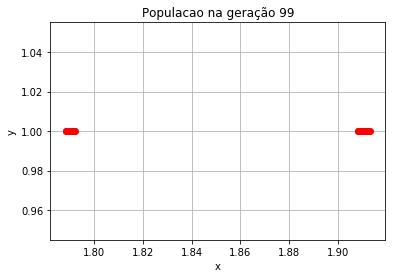

In [155]:
gBest = calcGBest(vParticles)

print('A convergencia foi atingida na geração: {}'.format(generation_index))
print('A particula vencedora foi: {}, com aptidão {}'.format(gBest, gBest['XBestFitness']))
print('A solução do problema é x={}'.format(gBest['X']))

plot_population2(vParticles, generation_index)